# CONFIGURATION

In [ ]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive

In [ ]:
! pip install pandas
! pip install scikit-learn
! pip install statsmodels
! pip install missingno
! pip install seaborn
! pip install pandas openpyxl
! pip install pandas matplotlib seaborn
! pip install xlsxwriter
! pip install dash dash-bootstrap-components pandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Create Datafarame

In [ ]:
source_dir = '/content/drive/My Drive/WTS_PROJECT/SOURCE'
destination_dir = '/content/drive/My Drive/WTS_PROJECT/CSV'

# Create destination directory if it does not exist
os.makedirs(destination_dir, exist_ok=True)

In [ ]:
# List all Excel files in the source directory
xlsx_files = glob.glob(os.path.join(source_dir, '*.xlsx'))

# Loop through the list of files
for file_path in xlsx_files:
    # Read the Excel file
    df = pd.read_excel(file_path)

    # Define the CSV file name
    base_name = os.path.basename(file_path)
    csv_file_name = os.path.splitext(base_name)[0] + '.csv'
    csv_file_path = os.path.join(destination_dir, csv_file_name)

    # Save the DataFrame to CSV
    df.to_csv(csv_file_path, index=False)

    # Optional: print the path of the saved CSV file
    #print(f'Saved: {csv_file_path}')

In [ ]:
WTS_files = glob.glob('/content/drive/My Drive/WTS_PROJECT/CSV/*.csv')
#print("CSV files found:", WTS_files)

In [ ]:
# Define the directory containing the CSV files
input_directory = '/content/drive/My Drive/WTS_PROJECT/CSV'  # Update with your input directory's path

# Initialize an empty list to hold dataframes
dataframes = []
locations = []

# Get all CSV files in the directory
csv_files = [file for file in os.listdir(input_directory) if file.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files.")

# Check if the expected number of files is correct
if len(csv_files) != 57:
    print("Warning: Expected 54 files, but found a different number.")

# Process each CSV file
for csv_file in csv_files:
    file_path = os.path.join(input_directory, csv_file)

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Assume the first column is 'Datetime' and the second is 'Reading'
    df.columns = ['Datetime', 'Reading']

    # Use the filename without extension as the location identifier for the column name
    location = os.path.splitext(csv_file)[0]
    locations.append(location)

    # Set 'Datetime' as index and rename 'Reading' to the location name
    df.set_index('Datetime', inplace=True)
    df.rename(columns={'Reading': location}, inplace=True)

    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all dataframes into one, aligning rows by 'Datetime'
final_df = pd.concat(dataframes, axis=1)

print("DataFrame shape after concatenation:", final_df.shape)
#print("Locations processed:", locations)

# Optionally, save the DataFrame to a new CSV file
output_file = '/content/drive/My Drive/WTS_PROJECT/consolidated_readings_by_location.csv'
final_df.to_csv(output_file)
#print(f"Consolidated data saved to {output_file}")

Found 57 CSV files.
DataFrame shape after concatenation: (17568, 57)


In [ ]:
final_df.shape

(17568, 57)

In [ ]:
import pandas as pd
import os
from datetime import datetime

# Define the directory containing the CSV files
input_directory = '/content/drive/My Drive/WTS_PROJECT/consolidated_readings_by_location.csv'
output_directory = '/content/drive/My Drive/WTS_PROJECT'
output_filename = 'consolidated_readings_by_location_formatted_003.csv'
output_filepath = os.path.join(output_directory, output_filename)

# Function to parse datetime strings based on a specific format
def parse_datetime(dt_str):
    try:
        return datetime.strptime(dt_str, "%d-%b-%y (%a) %H:%M:%S")
    except ValueError as e:
        print(f"Error parsing datetime: {dt_str} - {e}")
        return None

# Assuming 'final_df' is a DataFrame already created with the 'Datetime' index as string
# Check if the index conversion is necessary and convert if needed
if not isinstance(final_df.index, pd.DatetimeIndex):
    final_df.index = pd.to_datetime(final_df.index.map(parse_datetime))

# Check if the output directory exists, if not, create it
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Created directory: {output_directory}")

# Save the DataFrame to a CSV file
try:
    final_df.to_csv(output_filepath, date_format='%d-%b-%y %H:%M:%S')
    print(f"DataFrame successfully saved with formatted datetime to {output_filepath}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

DataFrame successfully saved with formatted datetime to /content/drive/My Drive/WTS_PROJECT/consolidated_readings_by_location_formatted_003.csv


In [ ]:
# Function to parse datetime strings based on a specific format
def parse_datetime(dt_str):
    try:
        # Here the expected format is like '24-Jun-23 (Sat) 00:00:00'
        return datetime.strptime(dt_str, "%d-%b-%y (%a) %H:%M:%S")
    except ValueError as e:
        print(f"Error parsing datetime: {dt_str} - {e}")
        return None

In [ ]:
# Display the data types of each column
print("\nData types of each column:")
print(final_df.dtypes)


Data types of each column:
017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP               float64
017271-PNL1_FUNG_WONG_SHAN-AMP                         float64
017271-PNL2_L_TX_D1-AMP                                float64
017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP              float64
017271-PNL4_L_TX_D2-AMP                                float64
029256-PNLBA_1_BD_A-L_TX-AMP                           float64
029256-PNLBA_2_BD_A-BD_B-AMP                           float64
029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP                  float64
029256-PNLBB_4_BD_B-LUNG_KWONG_HSE_^B^_TX-AMP          float64
029256-PNLBB_5_BD_B-WONG_TAI_SIN_LOWER_BLK_B_TX-AMP    float64
029256-PNLBB_7_BD_B-BD_A-AMP                           float64
029327-PNL1_L_TX-AMP                                   float64
029256-PNLBB_6_BD_B-WONG_TAI_SIN_PRIMARY_SCH-AMP       float64
029327-PNL2_LUNG_FAI_HSE_^B^_TX-AMP                    float64
029327-PNL3_LUNG_FAI_HSE_A_C_PLT-AMP                   float64
029327-PNL4_WONG_TAI_SIN_PA

In [ ]:
# Check for missing values
print("\nCheck for missing values:")
print(final_df.isnull().sum())


Check for missing values:
017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP               0
017271-PNL1_FUNG_WONG_SHAN-AMP                         0
017271-PNL2_L_TX_D1-AMP                                0
017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP              0
017271-PNL4_L_TX_D2-AMP                                0
029256-PNLBA_1_BD_A-L_TX-AMP                           0
029256-PNLBA_2_BD_A-BD_B-AMP                           0
029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP                  0
029256-PNLBB_4_BD_B-LUNG_KWONG_HSE_^B^_TX-AMP          0
029256-PNLBB_5_BD_B-WONG_TAI_SIN_LOWER_BLK_B_TX-AMP    0
029256-PNLBB_7_BD_B-BD_A-AMP                           0
029327-PNL1_L_TX-AMP                                   0
029256-PNLBB_6_BD_B-WONG_TAI_SIN_PRIMARY_SCH-AMP       0
029327-PNL2_LUNG_FAI_HSE_^B^_TX-AMP                    0
029327-PNL3_LUNG_FAI_HSE_A_C_PLT-AMP                   0
029327-PNL4_WONG_TAI_SIN_PACKAGE-AMP                   0
029327-PNL5_HSIN_KUANG_^A^_BD_B-AMP                    0
1580

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'final_df' is your existing DataFrame and already imported

# Display the DataFrame before handling empty cells
#print("DataFrame before handling empty cells:")
#print(final_df)

# Check and replace any non-standard representations of empty cells with NaN
# For example, if empty cells are empty strings or another placeholder, convert them to NaN
# final_df.replace('', np.nan, inplace=True)   # Uncomment and adjust if necessary

# Fill NaN values by interpolating between the points before and after
final_df.interpolate(method='linear', inplace=True)

# Display the DataFrame after handling empty cells
#print("\nDataFrame after handling empty cells:")
#print(final_df)

In [ ]:
# Define the directory and filename for saving the CSV file
output_directory = '/content/drive/My Drive/WTS_PROJECT'
output_filename = 'final_df_clean_PT4.csv'
output_filepath = os.path.join(output_directory, output_filename)

# Save the DataFrame to a CSV file
final_df.to_csv(output_filepath, index=True)  # Save with the index

print(f"DataFrame has been saved to {output_filepath}")

DataFrame has been saved to /content/drive/My Drive/WTS_PROJECT/final_df_clean_PT4.csv


# ANOMALY DETECTION (FULL DATASET)




In [ ]:
# Adjust the path to the location of your file on Google Drive
#file_path = '/content/drive/My Drive/WTS_PROJECT/consolidated_readings_by_location_formatted_002.csv'

file_path = '/content/drive/My Drive/WTS_PROJECT/final_df_clean.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Convert the 'Datetime' column to datetime type
data['Datetime'] = pd.to_datetime(data['Datetime'])

In [ ]:
data.set_index("Datetime",inplace=True)

In [ ]:
data.shape

(17568, 57)

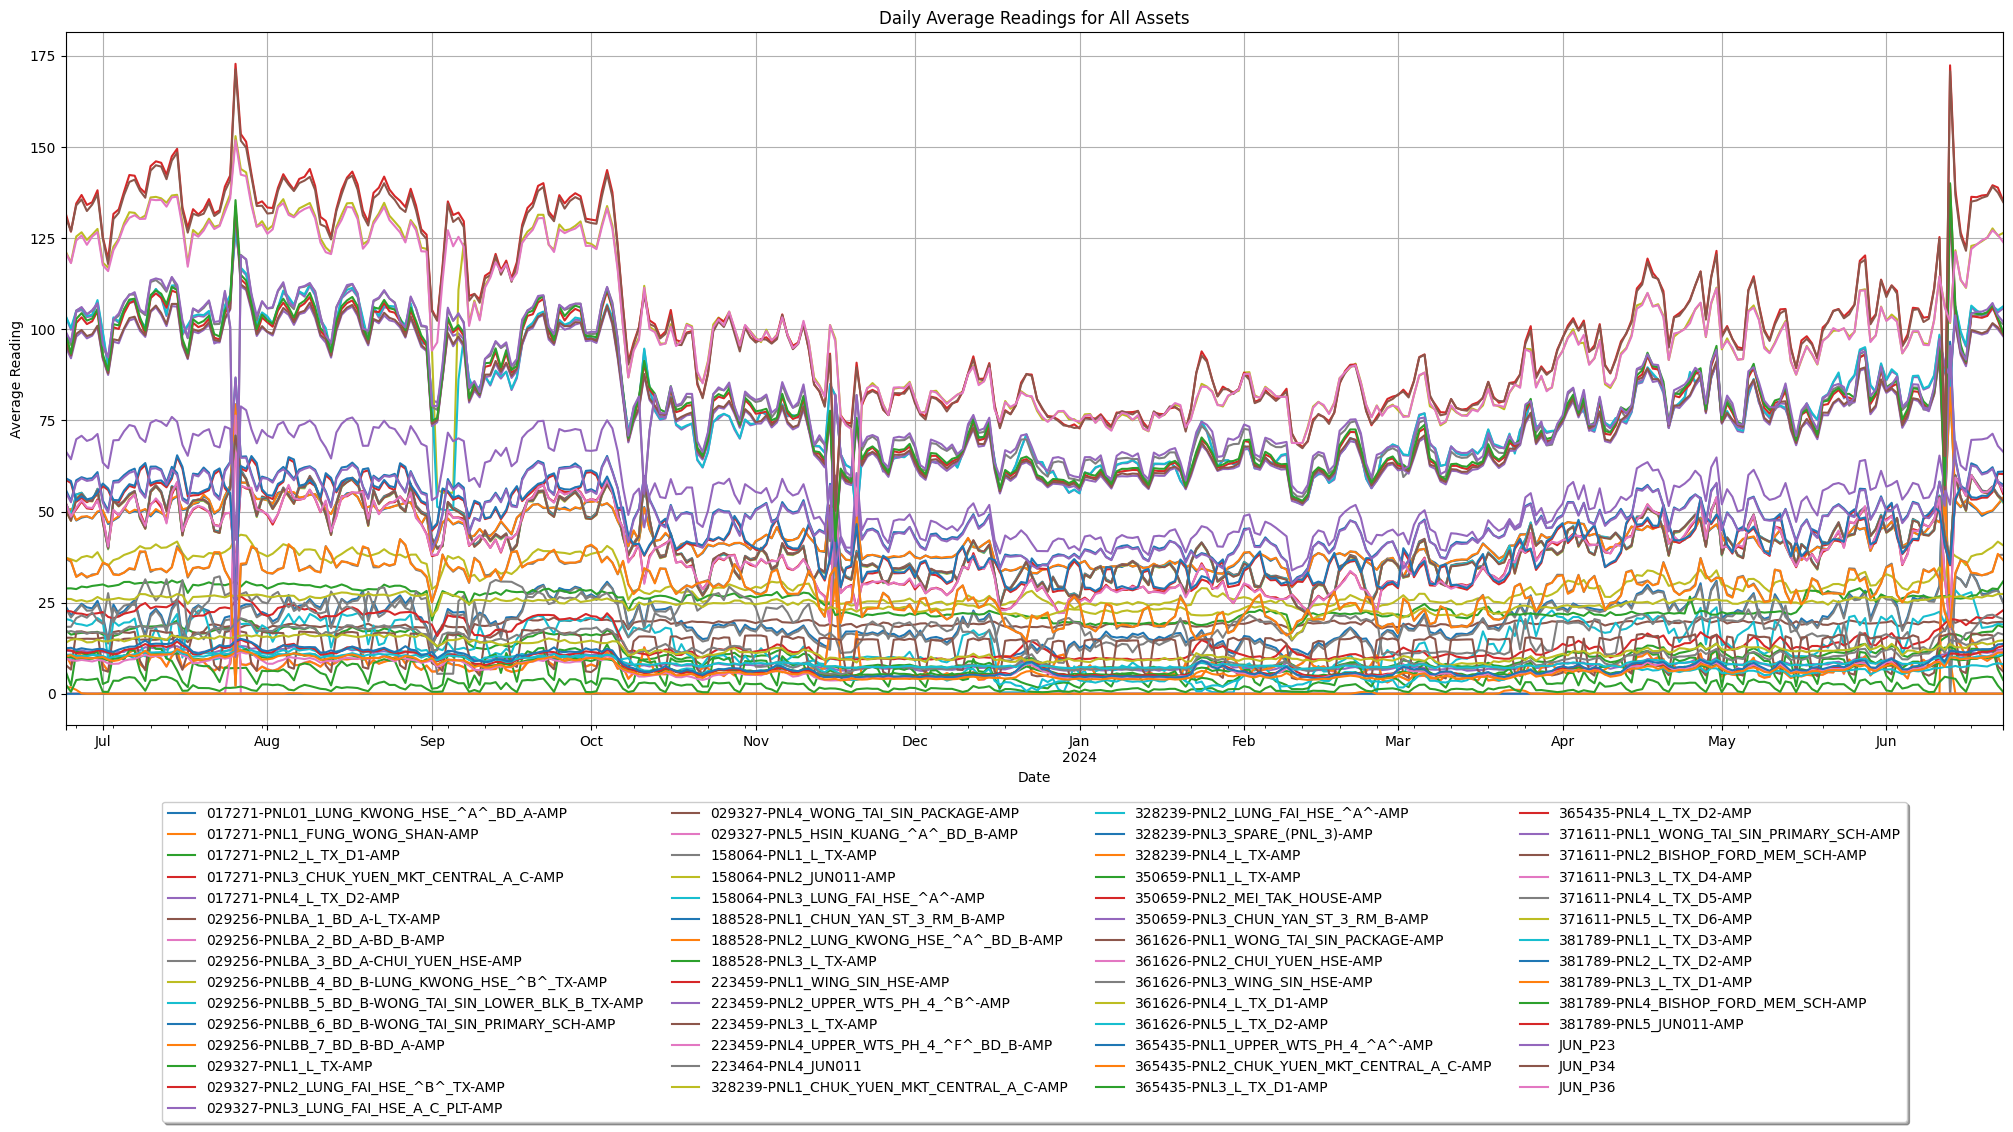

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# List of columns to drop
columns_to_drop = ['month', 'anomaly', 'anomaly_dbscan']

# Drop specified columns if they exist in the DataFrame
data_to_plot = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Compute daily averages
daily_data = data_to_plot.resample('D').mean()

# Plotting the daily averages
ax = daily_data.plot(figsize=(25, 10))  # Use ax for easier manipulation of the plot

# Add titles and labels
plt.title('Daily Average Readings for All Assets')
plt.xlabel('Date')
plt.ylabel('Average Reading')

# Adjust the legend
# Shrink the current axis's height by 10% on the bottom to make space for the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Place a legend below the current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

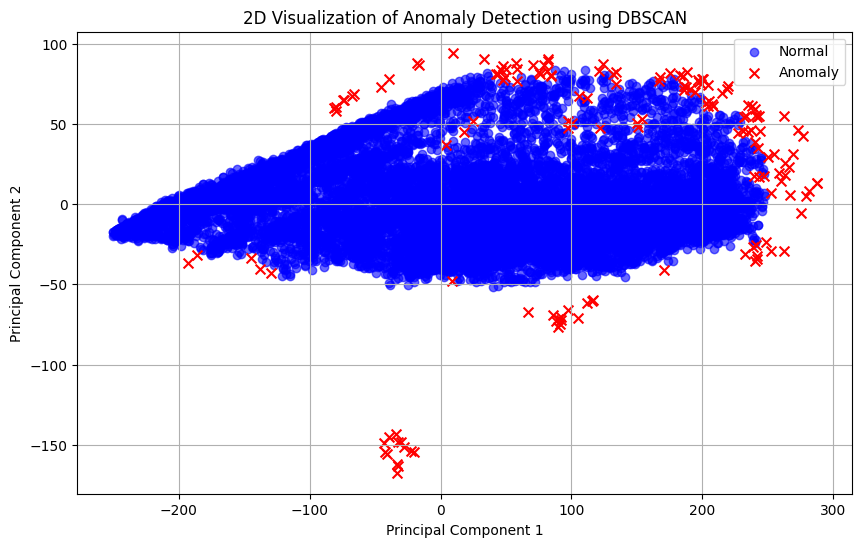

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=6, min_samples=8)  # Adjust these parameters if needed
labels = dbscan.fit_predict(data_2d)

# Step 3: Identify anomalies (noise points labeled as -1)
data['anomaly'] = (labels == -1).astype(int)  # 1 = Anomaly, 0 = Normal

# Separate normal and anomalous data for visualization
normal_data = data_2d[labels != -1]
anomalies = data_2d[labels == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



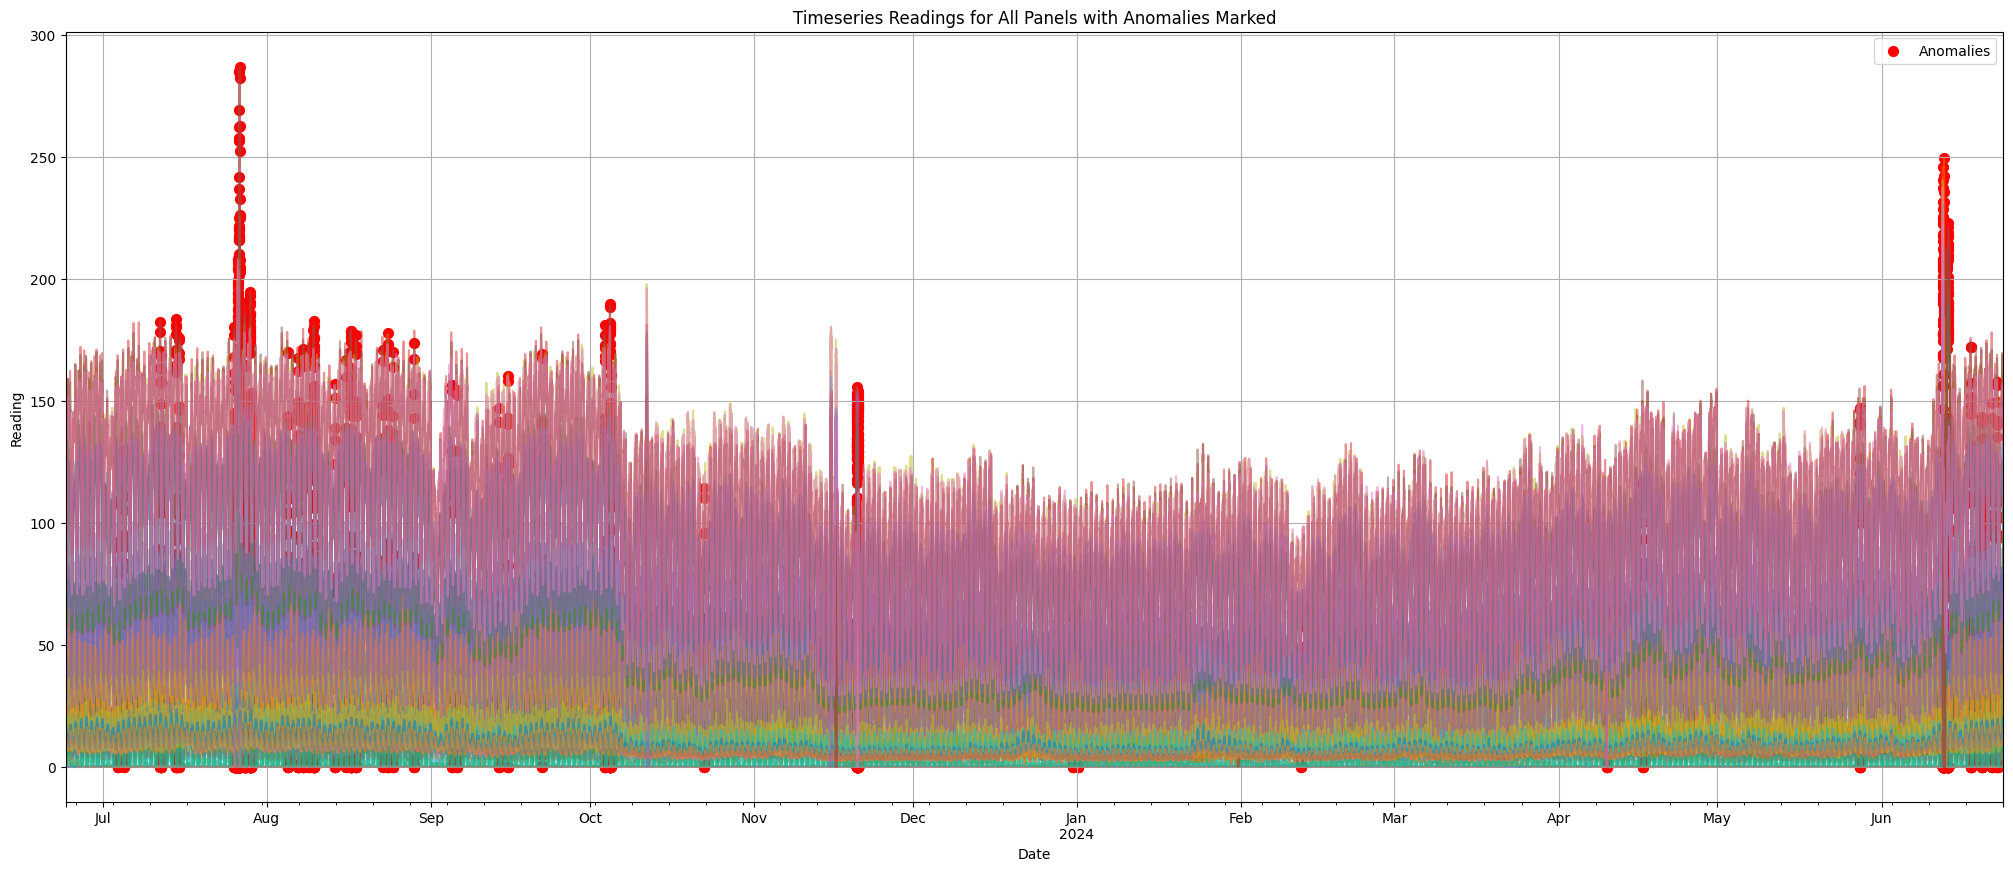

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# I assume that 'data' is your DataFrame loaded with the given structure

# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Plotting the timeseries for all columns except 'anomaly'
# Dropping non-numeric columns if present, assuming all your relevant columns are numeric
data_to_plot = data.drop(columns=['anomaly'], errors='ignore')

# Plot each column
ax = data_to_plot.plot(figsize=(25, 10), legend=False, alpha=0.5)  # Reduced alpha to better see anomalies

# Find anomalies - we'll highlight these in the plot
anomalies = data[data['anomaly'] == 1]

# Loop through each column to plot anomalies
for column in data_to_plot.columns:
    # Check if there are any anomalies in the current column
    if anomalies[column].any():
        ax.scatter(anomalies.index, anomalies[column], color='red', s=50, label='Anomalies', marker='o')

# Add titles and labels
plt.title('Timeseries Readings for All Panels with Anomalies Marked')
plt.xlabel('Date')
plt.ylabel('Reading')

# Because there are many lines, we won't use a legend for each line (legend=False above)
# Instead, we'll manually add a legend for anomalies if needed
handles, labels = ax.get_legend_handles_labels()
if 'Anomalies' in labels:
    # Only add one legend entry for anomalies
    plt.legend(handles=[handles[labels.index('Anomalies')]], labels=['Anomalies'])

plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

# ANOMALY DETECTION (JUN_P34)

In [ ]:
# Adjust the path to the location of your file on Google Drive
#file_path = '/content/drive/My Drive/WTS_PROJECT/consolidated_readings_by_location_formatted_002.csv'

file_path = '/content/drive/My Drive/WTS_PROJECT/final_df_clean.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Convert the 'Datetime' column to datetime type
#data['Datetime'] = pd.to_datetime(data['Datetime'])

In [ ]:
data.set_index("Datetime",inplace=True)

In [ ]:
# Assuming you want to keep the following columns
column_to_keep = [

    #'JUN_P23',
    #'JUN_P34',
    #'JUN_P36'


    'JUN_P34',
    '381789-PNL5_JUN011-AMP',
    #'381789-PNL4_BISHOP_FORD_MEM_SCH-AMP',
    #'350659-PNL2_MEI_TAK_HOUSE-AMP'


    #'361626-PNL2_CHUI_YUEN_HSE-AMP',
    #'017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP',
    #'017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP',
    #'029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP',
    #'029256-PNLBA_2_BD_A-BD_B-AMP',
    #'029256-PNLBB_7_BD_B-BD_A-AMP'


]

# Drop all other columns from the DataFrame
data = data[column_to_keep]

In [ ]:
data.shape

(17568, 2)

    'JUN_P34',
    '381789-PNL5_JUN011-AMP',
    '381789-PNL4_BISHOP_FORD_MEM_SCH-AMP',
    '350659-PNL2_MEI_TAK_HOUSE-AMP'

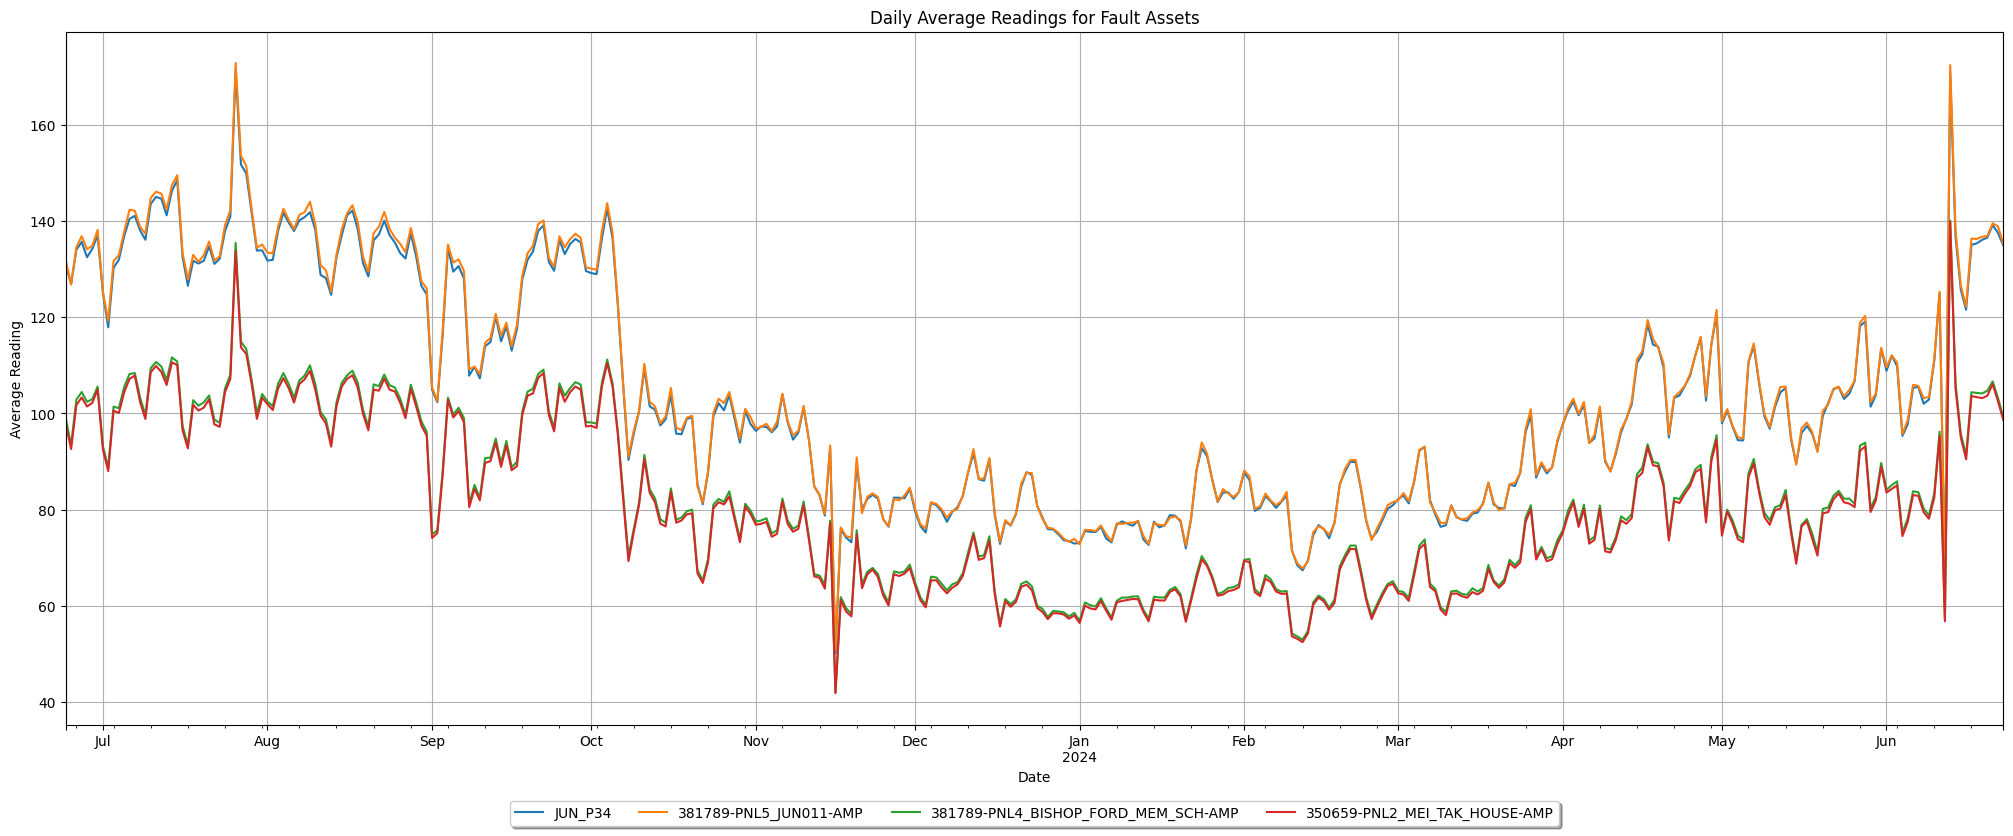

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# List of columns to drop
columns_to_drop = ['month', 'anomaly', 'anomaly_dbscan']

# Drop specified columns if they exist in the DataFrame
data_to_plot = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Compute daily averages
daily_data = data_to_plot.resample('D').mean()

# Plotting the daily averages
ax = daily_data.plot(figsize=(25, 10))  # Use ax for easier manipulation of the plot

# Add titles and labels
plt.title('Daily Average Readings for Fault Assets')
plt.xlabel('Date')
plt.ylabel('Average Reading')

# Adjust the legend
# Shrink the current axis's height by 10% on the bottom to make space for the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Place a legend below the current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

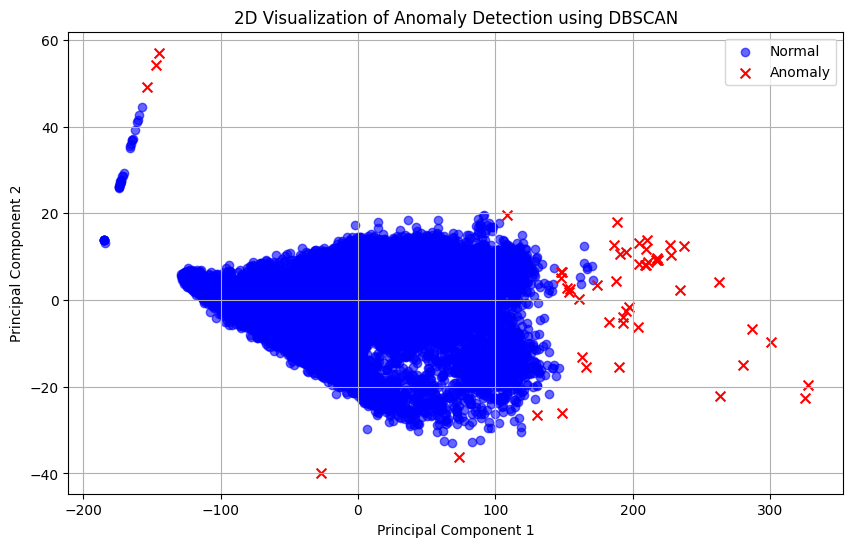

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=6, min_samples=8)  # Adjust these parameters if needed
labels = dbscan.fit_predict(data_2d)

# Step 3: Identify anomalies (noise points labeled as -1)
data['anomaly'] = (labels == -1).astype(int)  # 1 = Anomaly, 0 = Normal

# Separate normal and anomalous data for visualization
normal_data = data_2d[labels != -1]
anomalies = data_2d[labels == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



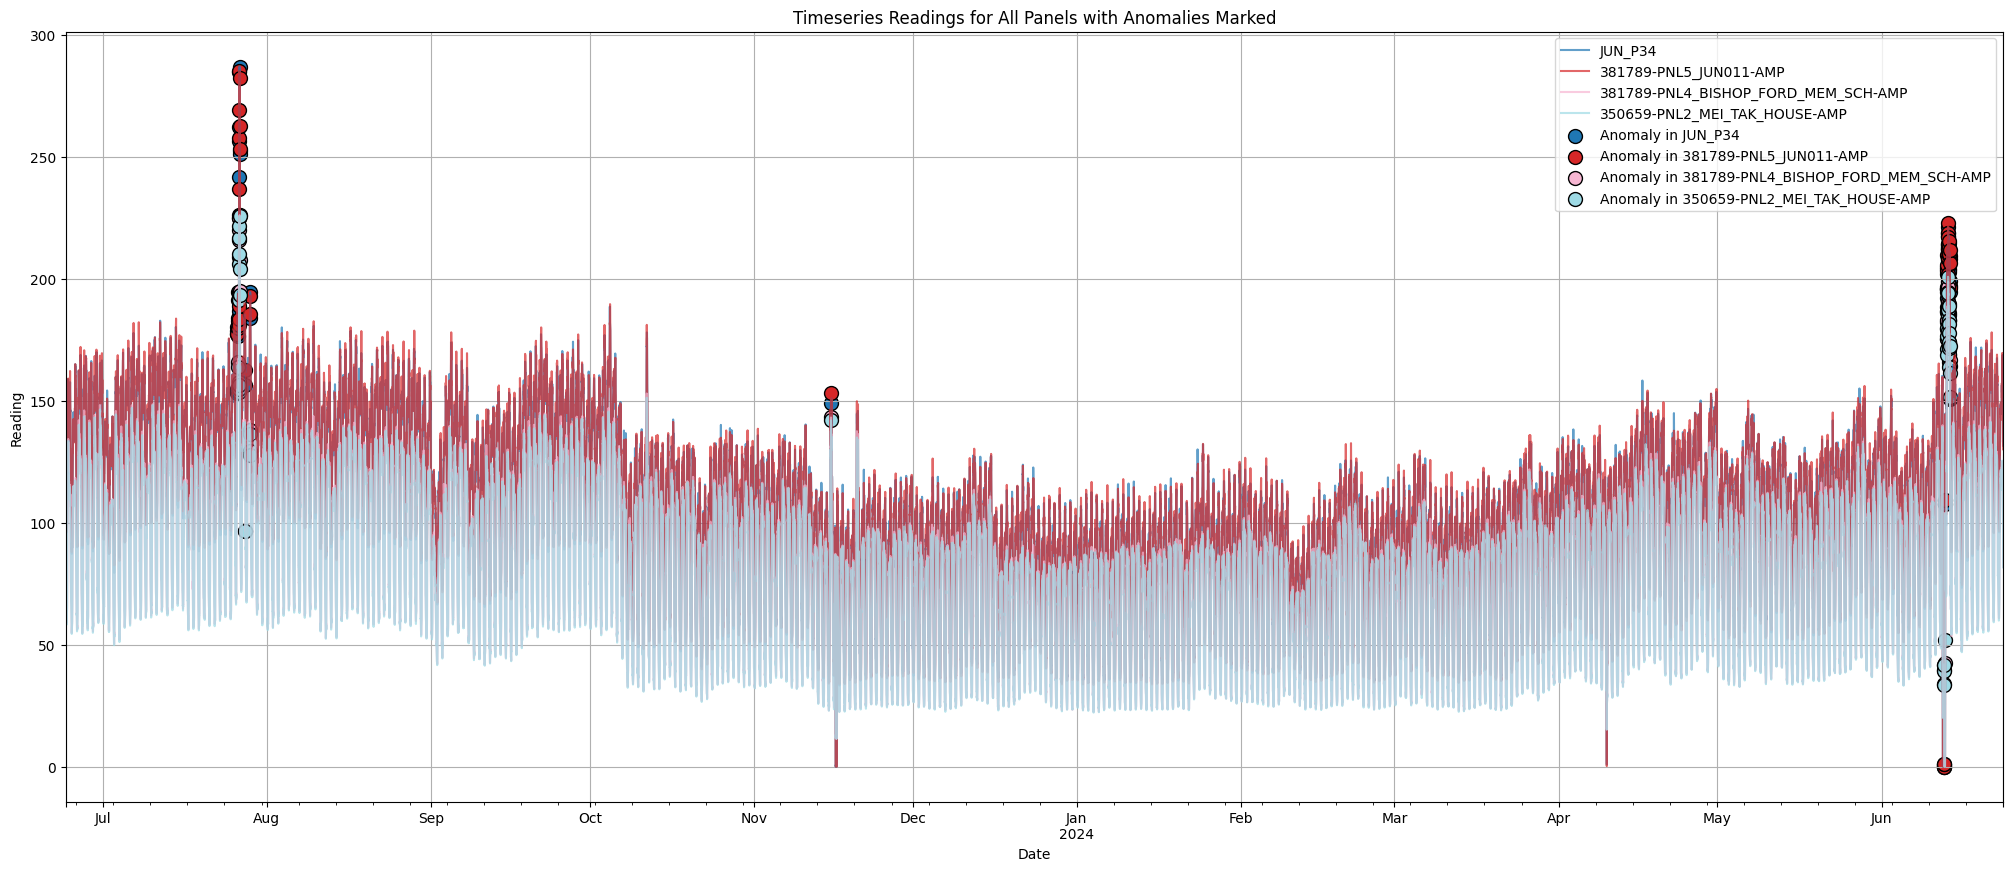

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume 'data' is your DataFrame loaded with the given structure

# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Specify the columns to plot; exclude columns not intended for plotting
columns_to_plot = [col for col in data.columns if col != 'anomaly']

# Generate a more diverse color map for each column to maintain consistency using 'tab20'
color_palette = plt.get_cmap('tab20')
num_colors = min(len(columns_to_plot), 20)  # 'tab20' supports up to 20 distinct colors
colors = color_palette(np.linspace(0, 1, num_colors))
color_map = dict(zip(columns_to_plot, colors))

# Plotting the time series for all columns
data_to_plot = data[columns_to_plot].dropna(axis=1, how='all')
ax = data_to_plot.plot(figsize=(25, 10), alpha=0.7, title='Timeseries Readings for All Panels with Anomalies Marked', color=[color_map[col] for col in columns_to_plot])

# Find anomalies - highlight these in the plot
anomalies = data[data['anomaly'] == 1]

# Loop through each column specified to plot anomalies
for column in columns_to_plot:
    if column in anomalies.columns:
        # Ensure anomalies are plotted only if there are non-NaN values
        valid_anomalies = anomalies.dropna(subset=[column])
        if not valid_anomalies.empty:
            # Use the same color for anomalies, but with a black edge to highlight them
            ax.scatter(valid_anomalies.index, valid_anomalies[column], color=color_map[column], edgecolor='black', s=100, label='Anomaly in ' + column, marker='o')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Reading')

# Adjust the legend to include each column and a general anomaly label if there are anomalies
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
anomaly_labels = set()
for handle, label in zip(handles, labels):
    if "Anomaly" in label:
        if label not in anomaly_labels:
            anomaly_labels.add(label)
            unique_handles.append(handle)
            unique_labels.append(label)
    elif "Anomaly" not in label and label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

plt.legend(unique_handles, unique_labels, loc='best')

plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

    'JUN_P34',
    '381789-PNL5_JUN011-AMP',
    #'381789-PNL4_BISHOP_FORD_MEM_SCH-AMP',
    #'350659-PNL2_MEI_TAK_HOUSE-AMP'

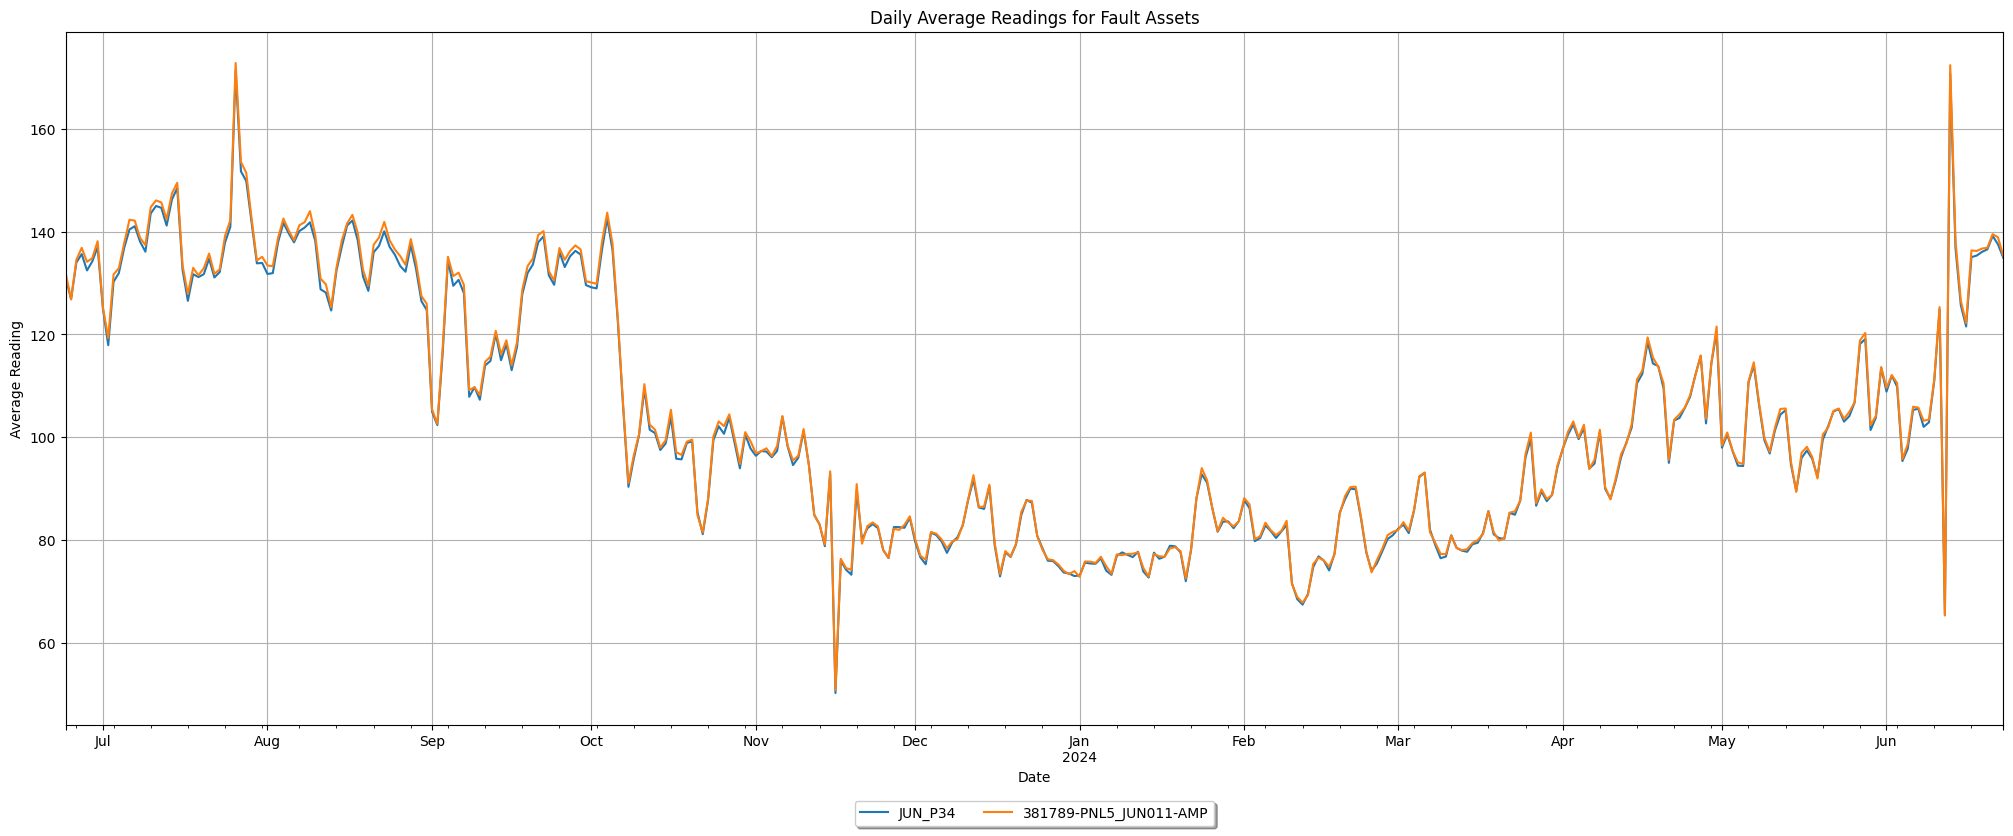

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# List of columns to drop
columns_to_drop = ['month', 'anomaly', 'anomaly_dbscan']

# Drop specified columns if they exist in the DataFrame
data_to_plot = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Compute daily averages
daily_data = data_to_plot.resample('D').mean()

# Plotting the daily averages
ax = daily_data.plot(figsize=(25, 10))  # Use ax for easier manipulation of the plot

# Add titles and labels
plt.title('Daily Average Readings for Fault Assets')
plt.xlabel('Date')
plt.ylabel('Average Reading')

# Adjust the legend
# Shrink the current axis's height by 10% on the bottom to make space for the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Place a legend below the current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

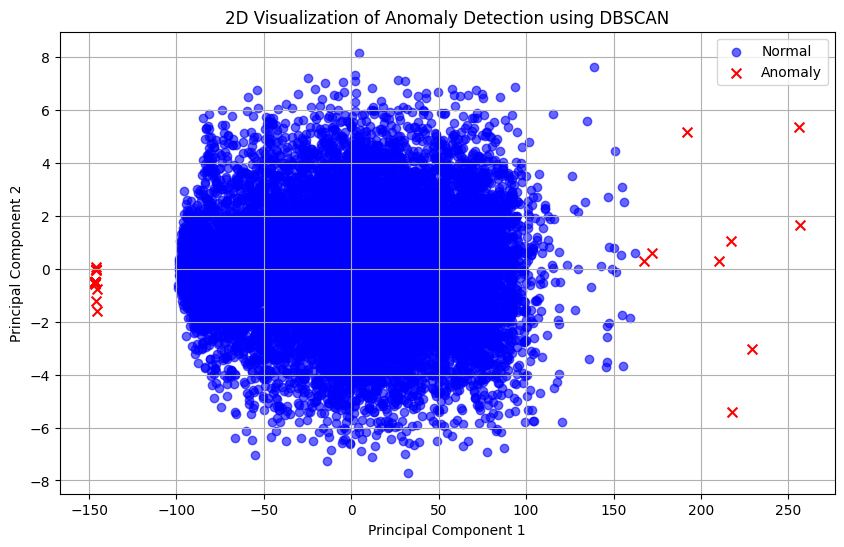

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=28, min_samples=48)  # Adjust these parameters if needed
labels = dbscan.fit_predict(data_2d)

# Step 3: Identify anomalies (noise points labeled as -1)
data['anomaly'] = (labels == -1).astype(int)  # 1 = Anomaly, 0 = Normal

# Separate normal and anomalous data for visualization
normal_data = data_2d[labels != -1]
anomalies = data_2d[labels == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



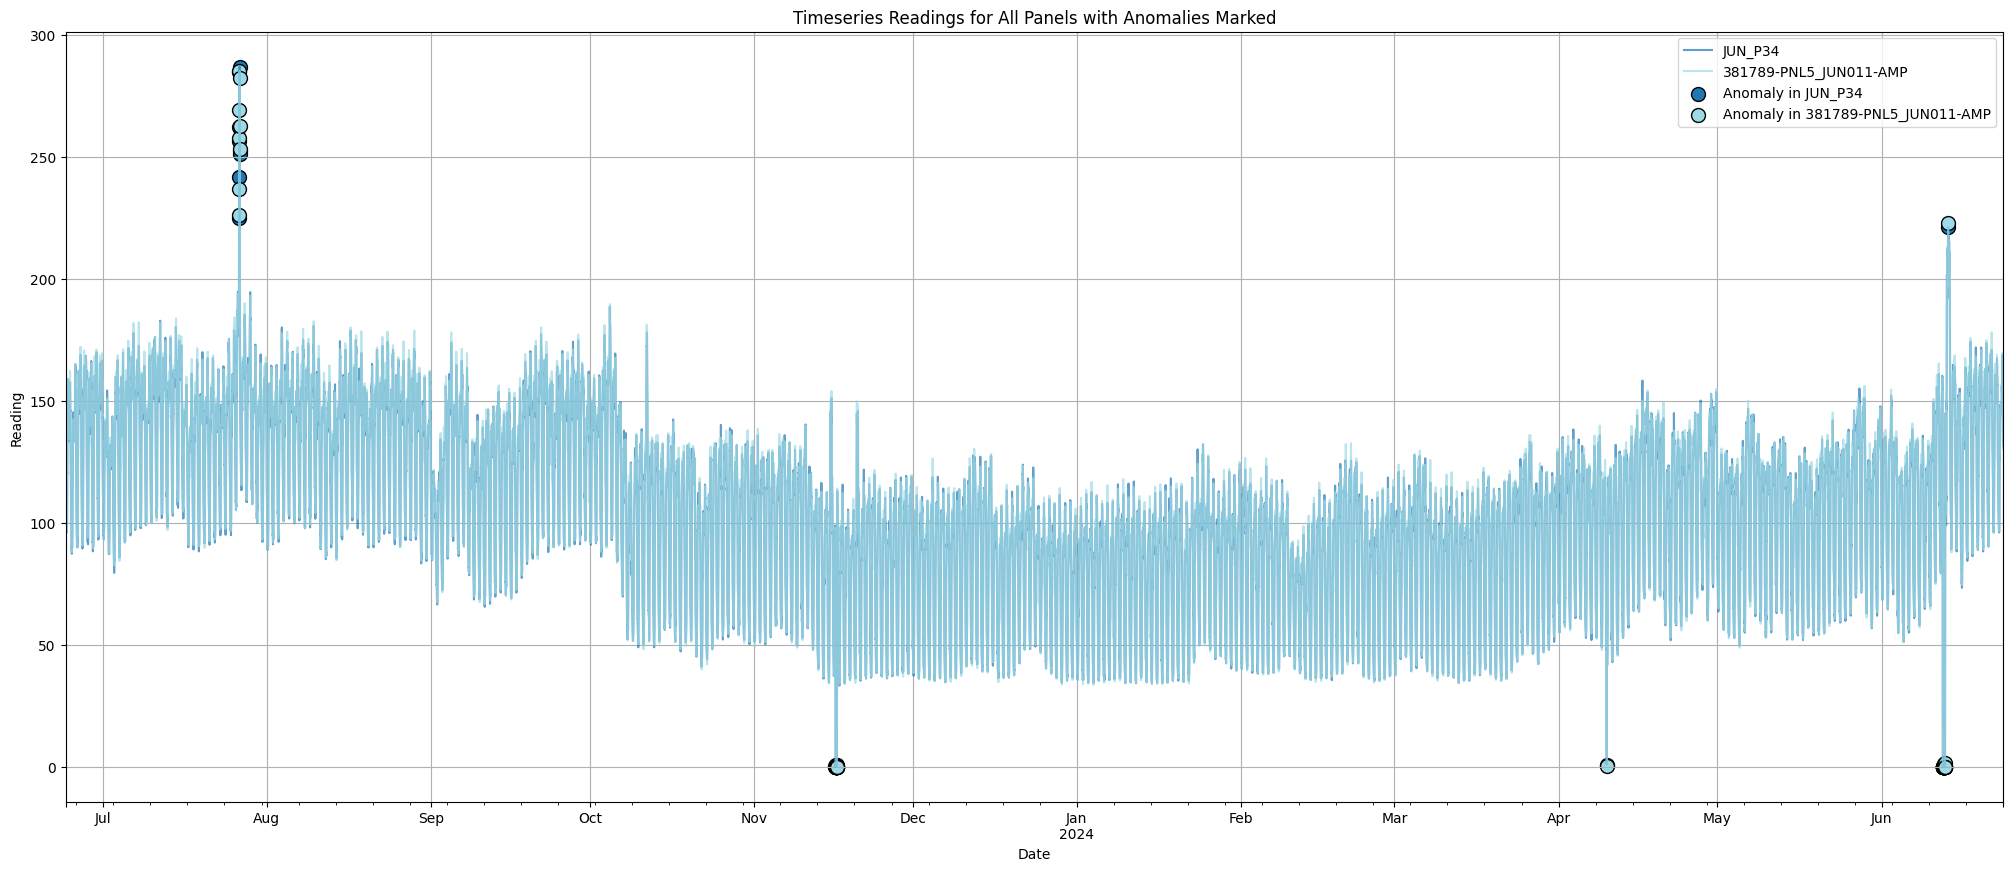

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume 'data' is your DataFrame loaded with the given structure

# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Specify the columns to plot; exclude columns not intended for plotting
columns_to_plot = [col for col in data.columns if col != 'anomaly']

# Generate a more diverse color map for each column to maintain consistency using 'tab20'
color_palette = plt.get_cmap('tab20')
num_colors = min(len(columns_to_plot), 20)  # 'tab20' supports up to 20 distinct colors
colors = color_palette(np.linspace(0, 1, num_colors))
color_map = dict(zip(columns_to_plot, colors))

# Plotting the time series for all columns
data_to_plot = data[columns_to_plot].dropna(axis=1, how='all')
ax = data_to_plot.plot(figsize=(25, 10), alpha=0.7, title='Timeseries Readings for All Panels with Anomalies Marked', color=[color_map[col] for col in columns_to_plot])

# Find anomalies - highlight these in the plot
anomalies = data[data['anomaly'] == 1]

# Loop through each column specified to plot anomalies
for column in columns_to_plot:
    if column in anomalies.columns:
        # Ensure anomalies are plotted only if there are non-NaN values
        valid_anomalies = anomalies.dropna(subset=[column])
        if not valid_anomalies.empty:
            # Use the same color for anomalies, but with a black edge to highlight them
            ax.scatter(valid_anomalies.index, valid_anomalies[column], color=color_map[column], edgecolor='black', s=100, label='Anomaly in ' + column, marker='o')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Reading')

# Adjust the legend to include each column and a general anomaly label if there are anomalies
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
anomaly_labels = set()
for handle, label in zip(handles, labels):
    if "Anomaly" in label:
        if label not in anomaly_labels:
            anomaly_labels.add(label)
            unique_handles.append(handle)
            unique_labels.append(label)
    elif "Anomaly" not in label and label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

plt.legend(unique_handles, unique_labels, loc='best')

plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

In [ ]:
# Save the modified data to Google Drive

drive_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_JUN_P34.csv'
data.to_csv(drive_path)

# ANOMALY DETECTION (361626)

In [ ]:
# Adjust the path to the location of your file on Google Drive
#file_path = '/content/drive/My Drive/WTS_PROJECT/consolidated_readings_by_location_formatted_002.csv'

file_path = '/content/drive/My Drive/WTS_PROJECT/final_df_clean.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Convert the 'Datetime' column to datetime type
#data['Datetime'] = pd.to_datetime(data['Datetime'])

In [ ]:
data.set_index("Datetime",inplace=True)

In [ ]:
# Assuming you want to keep the following columns
column_to_keep = [

    #'JUN_P23',
    #'JUN_P34',
    #'JUN_P36'


    #'JUN_P34',
    #'381789-PNL5_JUN011-AMP',
    #'381789-PNL4_BISHOP_FORD_MEM_SCH-AMP',
    #'350659-PNL2_MEI_TAK_HOUSE-AMP'


    #'361626-PNL2_CHUI_YUEN_HSE-AMP',
    #'017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP',
    '017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP',
    '029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP',
    #'029256-PNLBA_2_BD_A-BD_B-AMP',
    #'029256-PNLBB_7_BD_B-BD_A-AMP'


]

# Drop all other columns from the DataFrame
data = data[column_to_keep]

In [ ]:
data.shape

(17568, 2)

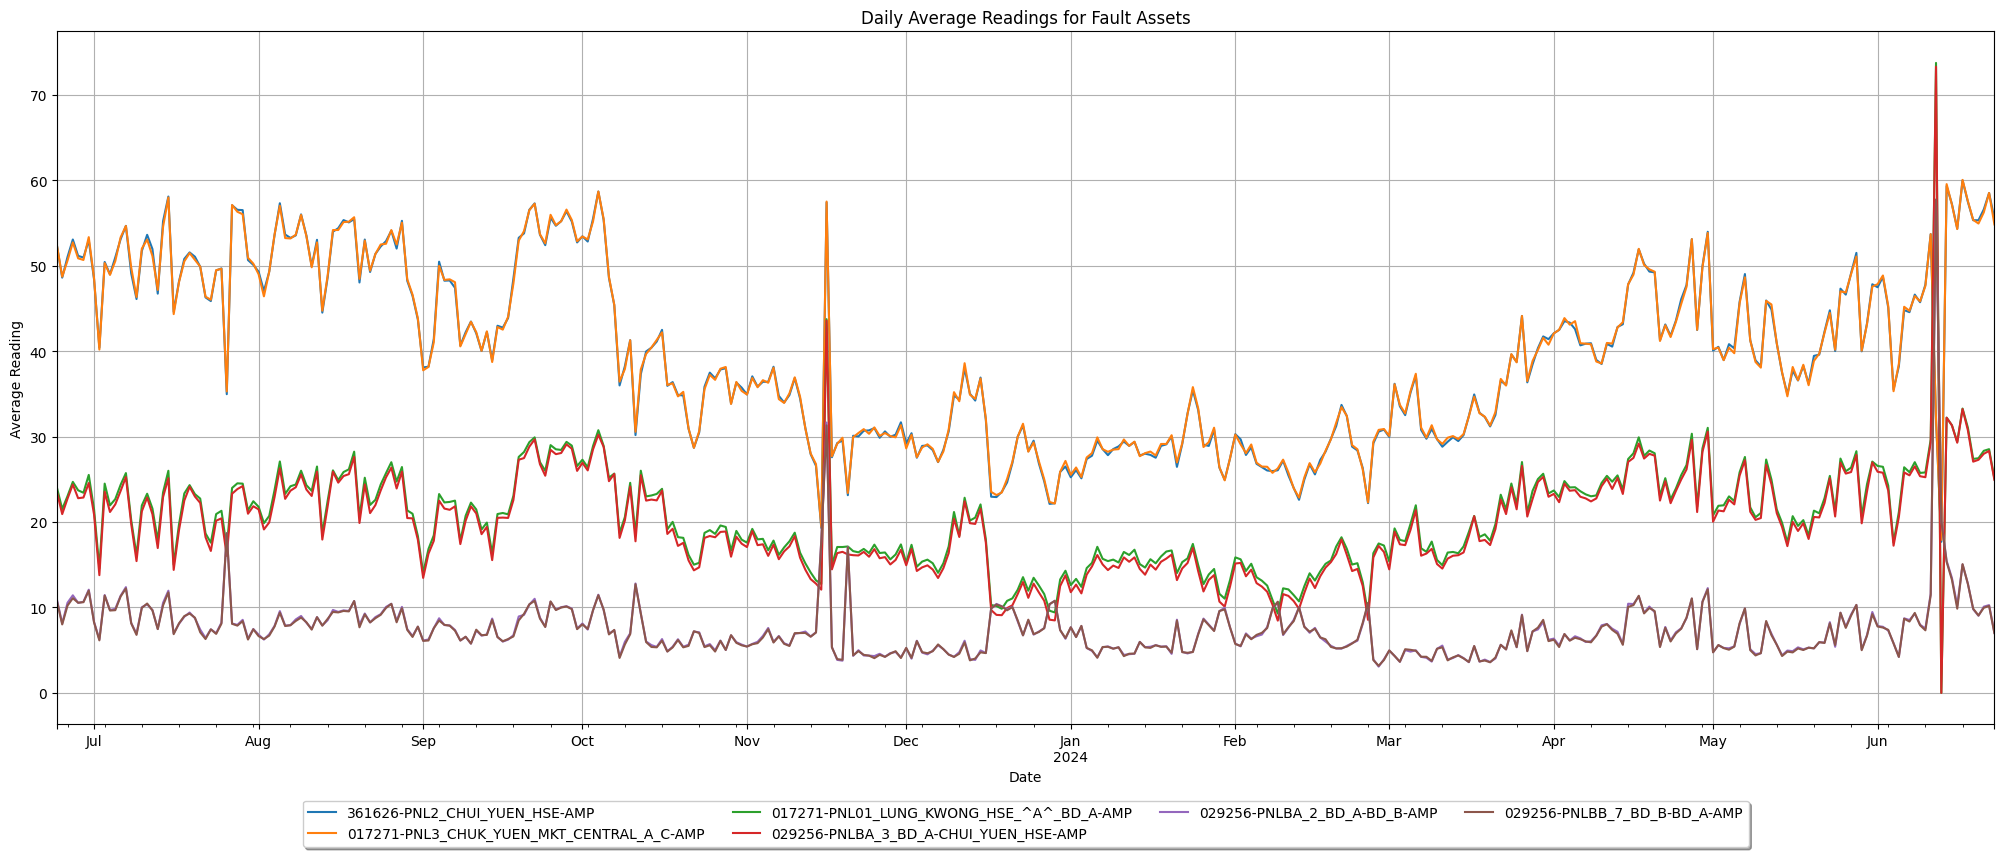

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# List of columns to drop
columns_to_drop = ['month', 'anomaly', 'anomaly_dbscan']

# Drop specified columns if they exist in the DataFrame
data_to_plot = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Compute daily averages
daily_data = data_to_plot.resample('D').mean()

# Plotting the daily averages
ax = daily_data.plot(figsize=(25, 10))  # Use ax for easier manipulation of the plot

# Add titles and labels
plt.title('Daily Average Readings for Fault Assets')
plt.xlabel('Date')
plt.ylabel('Average Reading')

# Adjust the legend
# Shrink the current axis's height by 10% on the bottom to make space for the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Place a legend below the current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

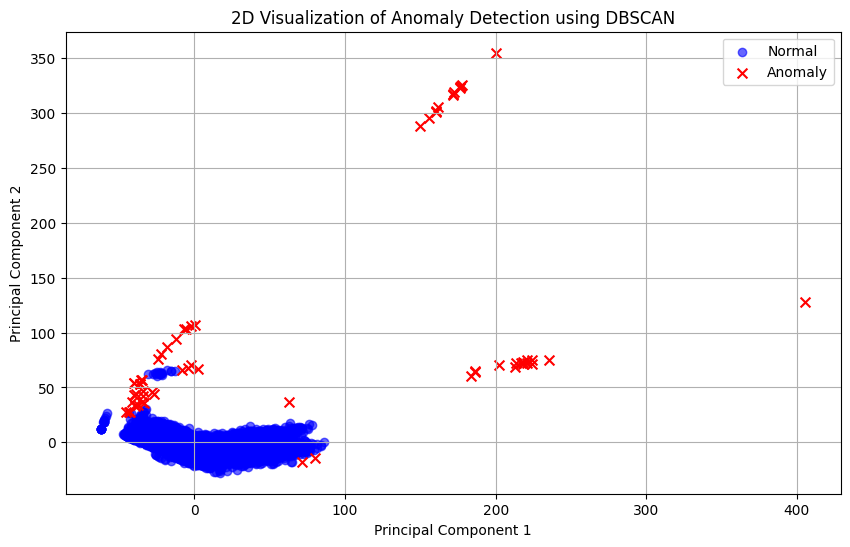

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=6, min_samples=8)  # Adjust these parameters if needed
labels = dbscan.fit_predict(data_2d)

# Step 3: Identify anomalies (noise points labeled as -1)
data['anomaly'] = (labels == -1).astype(int)  # 1 = Anomaly, 0 = Normal

# Separate normal and anomalous data for visualization
normal_data = data_2d[labels != -1]
anomalies = data_2d[labels == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



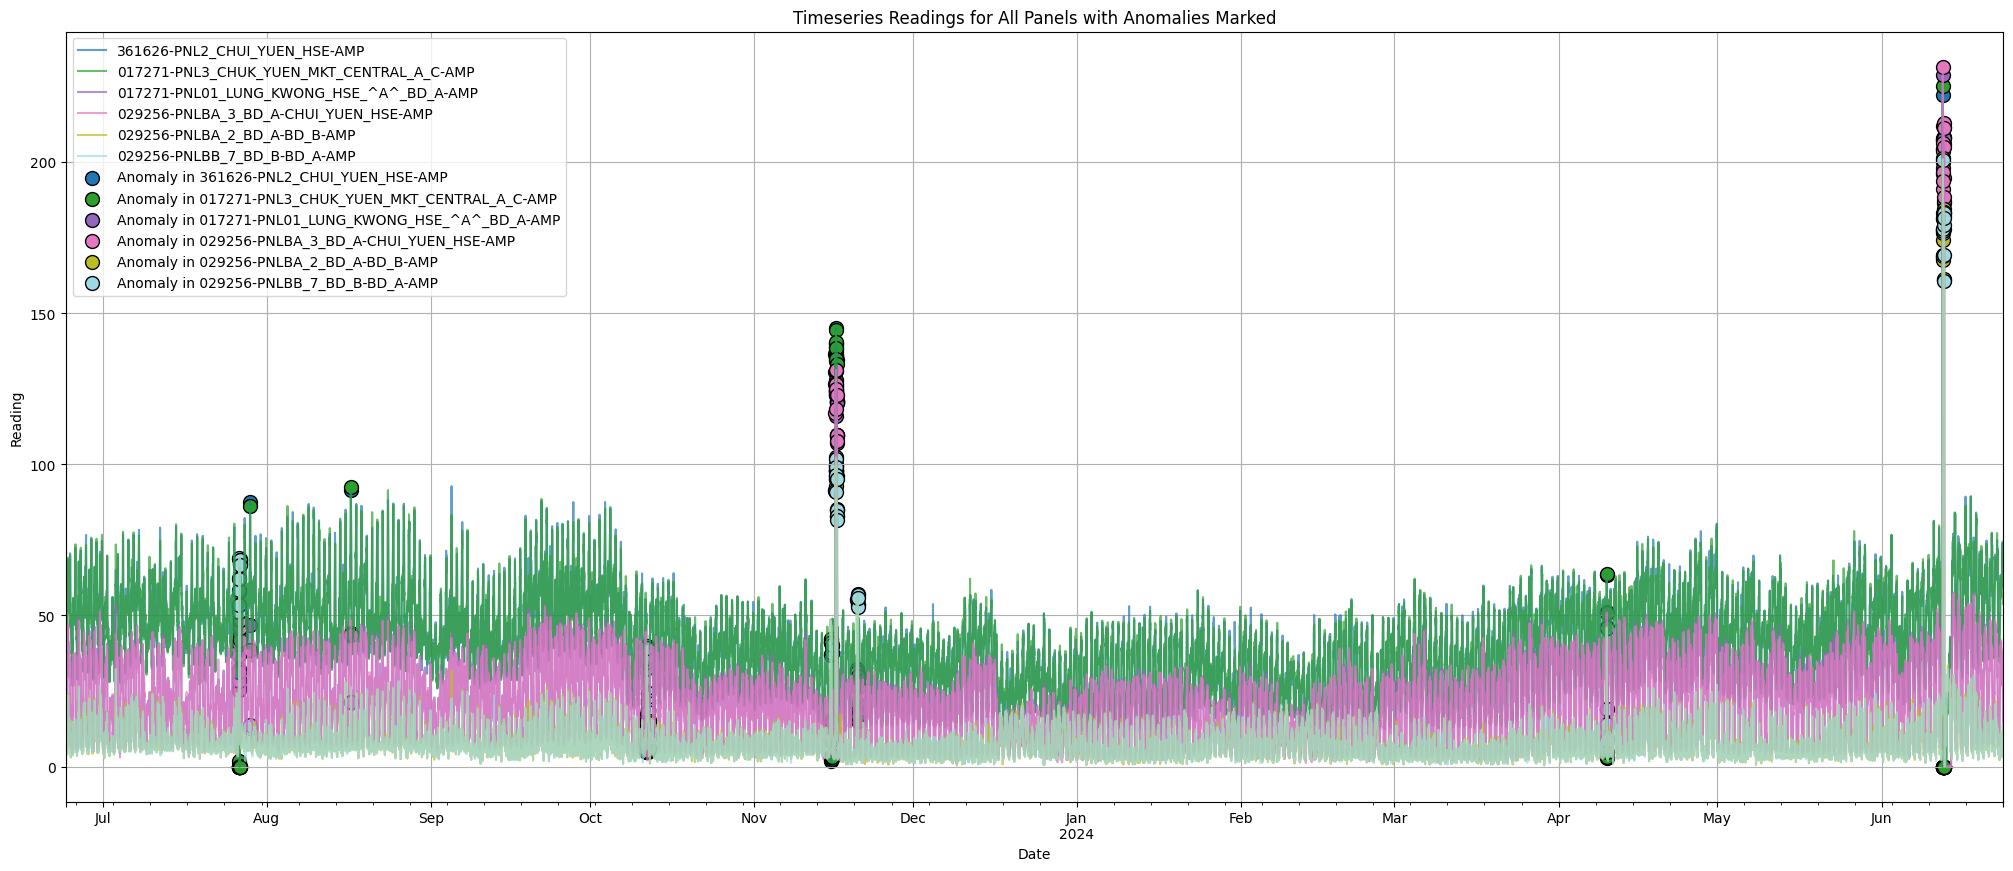

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume 'data' is your DataFrame loaded with the given structure

# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Specify the columns to plot; exclude columns not intended for plotting
columns_to_plot = [col for col in data.columns if col != 'anomaly']

# Generate a more diverse color map for each column to maintain consistency using 'tab20'
color_palette = plt.get_cmap('tab20')
num_colors = min(len(columns_to_plot), 20)  # 'tab20' supports up to 20 distinct colors
colors = color_palette(np.linspace(0, 1, num_colors))
color_map = dict(zip(columns_to_plot, colors))

# Plotting the time series for all columns
data_to_plot = data[columns_to_plot].dropna(axis=1, how='all')
ax = data_to_plot.plot(figsize=(25, 10), alpha=0.7, title='Timeseries Readings for All Panels with Anomalies Marked', color=[color_map[col] for col in columns_to_plot])

# Find anomalies - highlight these in the plot
anomalies = data[data['anomaly'] == 1]

# Loop through each column specified to plot anomalies
for column in columns_to_plot:
    if column in anomalies.columns:
        # Ensure anomalies are plotted only if there are non-NaN values
        valid_anomalies = anomalies.dropna(subset=[column])
        if not valid_anomalies.empty:
            # Use the same color for anomalies, but with a black edge to highlight them
            ax.scatter(valid_anomalies.index, valid_anomalies[column], color=color_map[column], edgecolor='black', s=100, label='Anomaly in ' + column, marker='o')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Reading')

# Adjust the legend to include each column and a general anomaly label if there are anomalies
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
anomaly_labels = set()
for handle, label in zip(handles, labels):
    if "Anomaly" in label:
        if label not in anomaly_labels:
            anomaly_labels.add(label)
            unique_handles.append(handle)
            unique_labels.append(label)
    elif "Anomaly" not in label and label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

plt.legend(unique_handles, unique_labels, loc='best')

plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

    #'361626-PNL2_CHUI_YUEN_HSE-AMP',
    #'017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP',
    '017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP',
    '029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP',
    #'029256-PNLBA_2_BD_A-BD_B-AMP',
    #'029256-PNLBB_7_BD_B-BD_A-AMP'

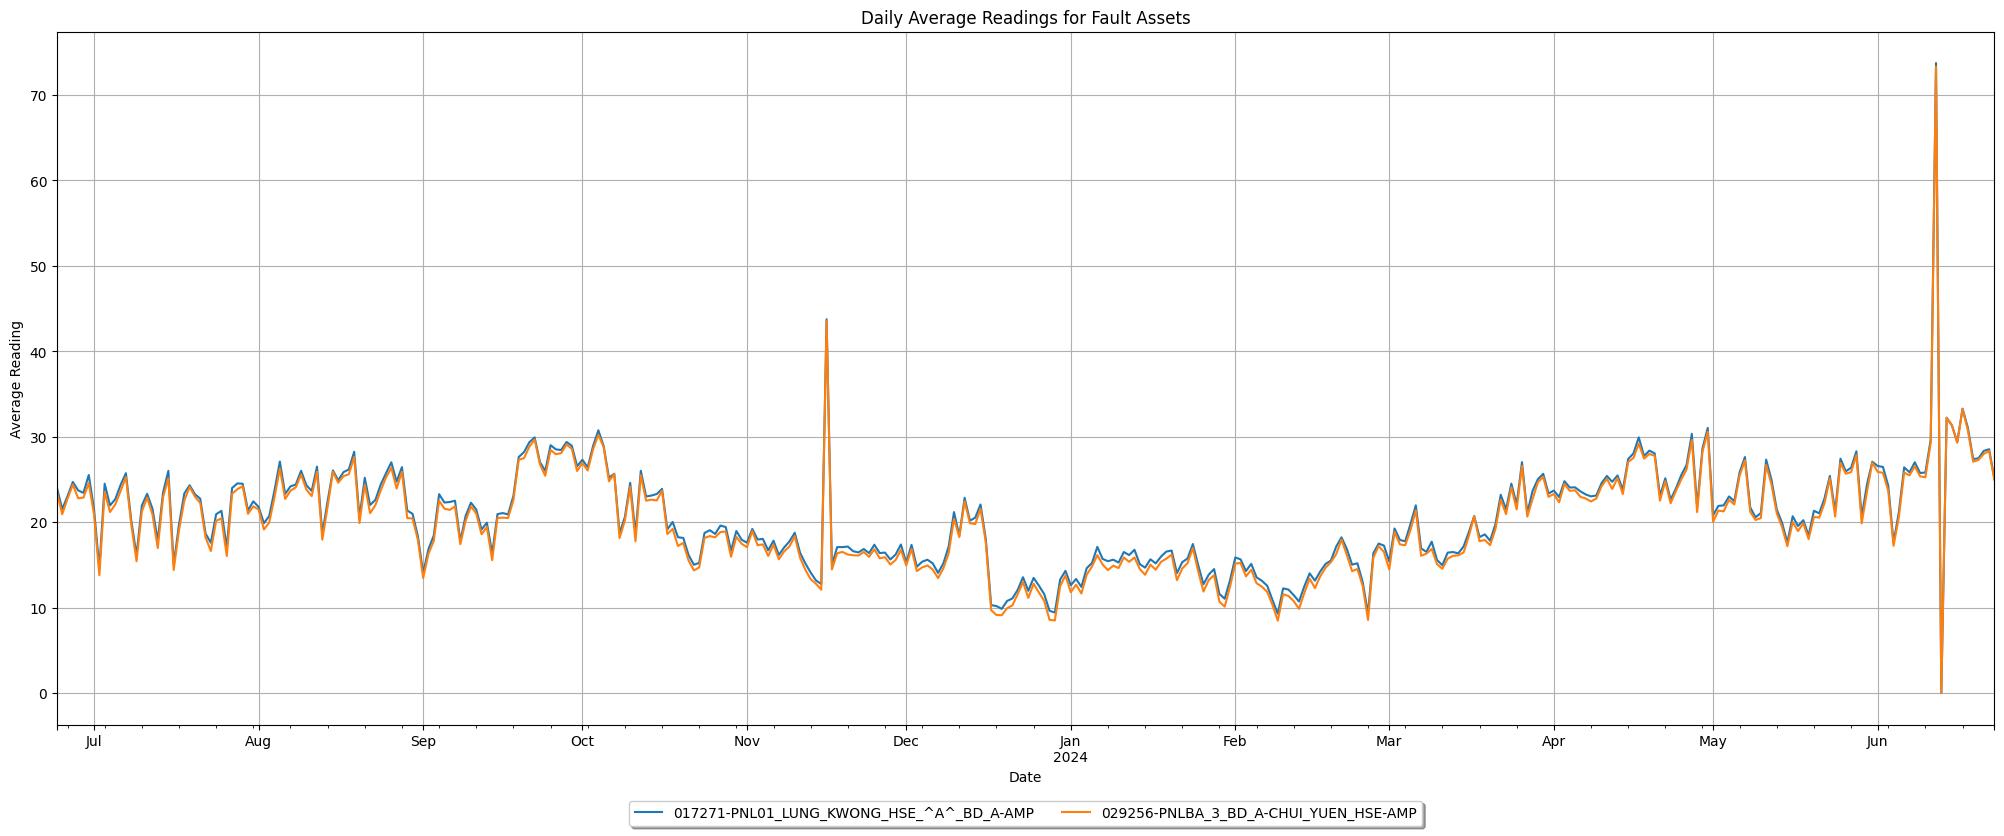

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# List of columns to drop
columns_to_drop = ['month', 'anomaly', 'anomaly_dbscan']

# Drop specified columns if they exist in the DataFrame
data_to_plot = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Compute daily averages
daily_data = data_to_plot.resample('D').mean()

# Plotting the daily averages
ax = daily_data.plot(figsize=(25, 10))  # Use ax for easier manipulation of the plot

# Add titles and labels
plt.title('Daily Average Readings for Fault Assets')
plt.xlabel('Date')
plt.ylabel('Average Reading')

# Adjust the legend
# Shrink the current axis's height by 10% on the bottom to make space for the legend outside the plot
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Place a legend below the current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=4)

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

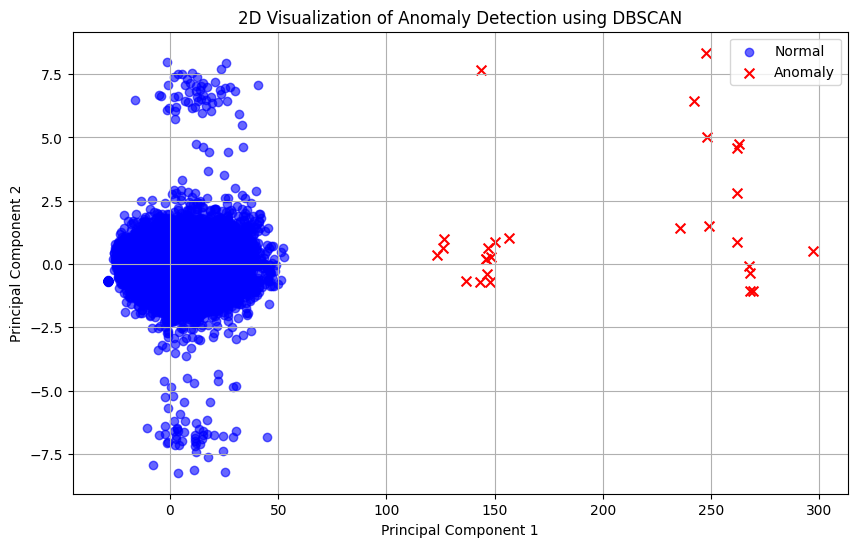

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=6, min_samples=55)  # Adjust these parameters if needed
labels = dbscan.fit_predict(data_2d)

# Step 3: Identify anomalies (noise points labeled as -1)
data['anomaly'] = (labels == -1).astype(int)  # 1 = Anomaly, 0 = Normal

# Separate normal and anomalous data for visualization
normal_data = data_2d[labels != -1]
anomalies = data_2d[labels == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



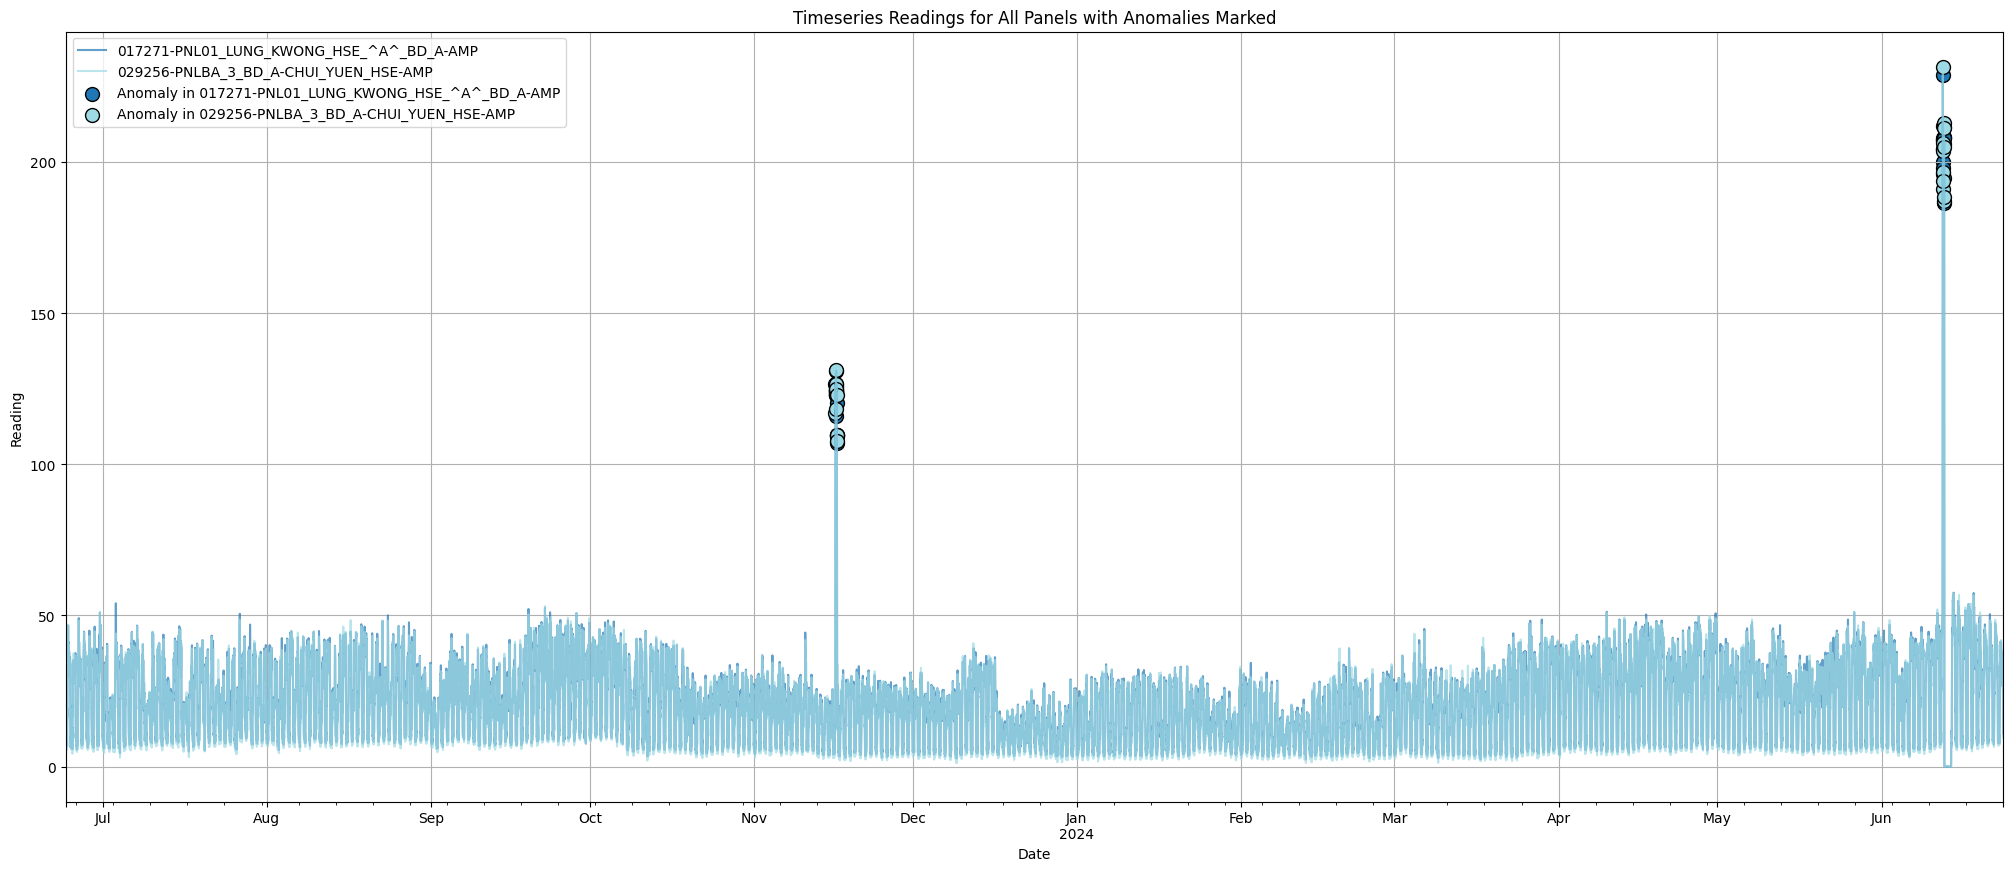

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume 'data' is your DataFrame loaded with the given structure

# Convert index to datetime if not already
data.index = pd.to_datetime(data.index)

# Specify the columns to plot; exclude columns not intended for plotting
columns_to_plot = [col for col in data.columns if col != 'anomaly']

# Generate a more diverse color map for each column to maintain consistency using 'tab20'
color_palette = plt.get_cmap('tab20')
num_colors = min(len(columns_to_plot), 20)  # 'tab20' supports up to 20 distinct colors
colors = color_palette(np.linspace(0, 1, num_colors))
color_map = dict(zip(columns_to_plot, colors))

# Plotting the time series for all columns
data_to_plot = data[columns_to_plot].dropna(axis=1, how='all')
ax = data_to_plot.plot(figsize=(25, 10), alpha=0.7, title='Timeseries Readings for All Panels with Anomalies Marked', color=[color_map[col] for col in columns_to_plot])

# Find anomalies - highlight these in the plot
anomalies = data[data['anomaly'] == 1]

# Loop through each column specified to plot anomalies
for column in columns_to_plot:
    if column in anomalies.columns:
        # Ensure anomalies are plotted only if there are non-NaN values
        valid_anomalies = anomalies.dropna(subset=[column])
        if not valid_anomalies.empty:
            # Use the same color for anomalies, but with a black edge to highlight them
            ax.scatter(valid_anomalies.index, valid_anomalies[column], color=color_map[column], edgecolor='black', s=100, label='Anomaly in ' + column, marker='o')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Reading')

# Adjust the legend to include each column and a general anomaly label if there are anomalies
handles, labels = ax.get_legend_handles_labels()
unique_labels = []
unique_handles = []
anomaly_labels = set()
for handle, label in zip(handles, labels):
    if "Anomaly" in label:
        if label not in anomaly_labels:
            anomaly_labels.add(label)
            unique_handles.append(handle)
            unique_labels.append(label)
    elif "Anomaly" not in label and label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

plt.legend(unique_handles, unique_labels, loc='best')

plt.grid(True)  # Add grid for better readability

# Show the plot
plt.show()

In [ ]:
# Save the modified data to Google Drive

drive_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_361626.csv'
data.to_csv(drive_path)

# BINARY Model Training Using Data Labeled by DBSCAN (JUN_P34)

In [ ]:
pip install dash dash-bootstrap-components pandas plotly

X shape: (17563, 5, 2), y shape: (17563,)
Original X shape: (17563, 5, 2), y shape: (17563,)
Resampled X shape: (21008, 5, 2), y shape: (21008,)
Training CNN model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8705 - loss: 0.4083 - val_accuracy: 0.9542 - val_loss: 0.1415
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9631 - loss: 0.1319 - val_accuracy: 0.9771 - val_loss: 0.0994
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.1089 - val_accuracy: 0.9753 - val_loss: 0.0940
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9749 - loss: 0.0954 - val_accuracy: 0.9771 - val_loss: 0.0933
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9740 - loss: 0.1043 - val_accuracy: 0.9774 - val_loss: 0.0930
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN Model - Accuracy: 0.9826, Precision: 0.9936, Recall: 0.8996, F1 Score: 0.9442


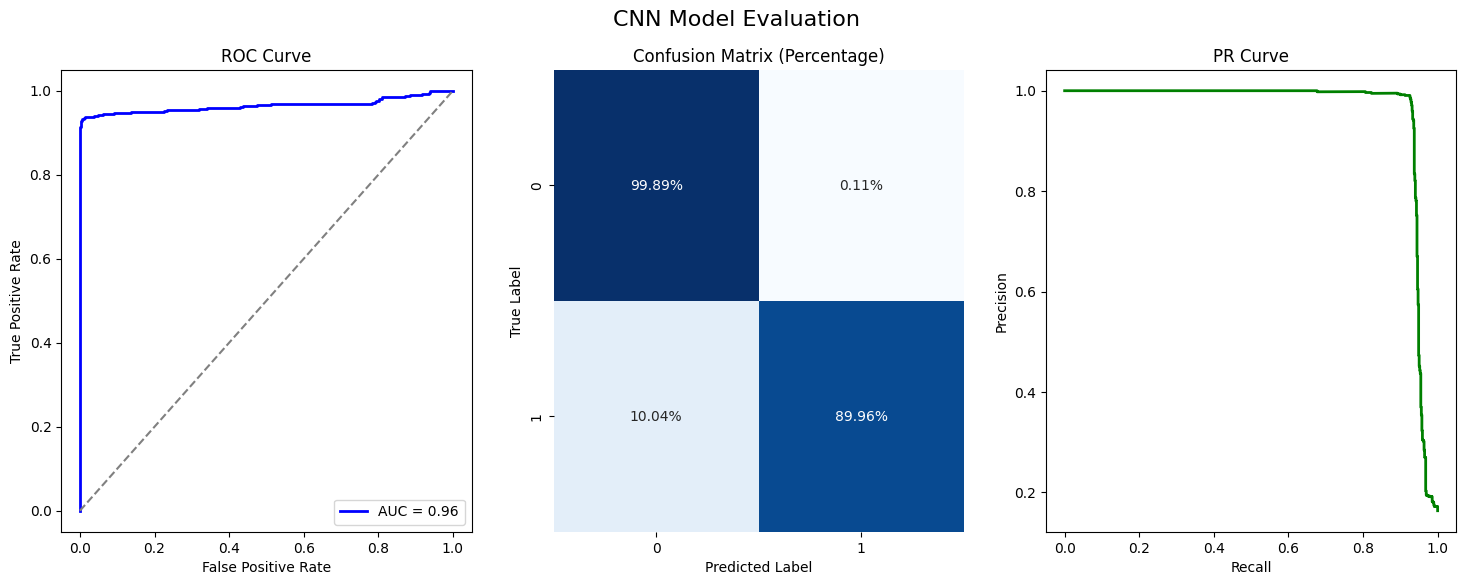

Training LSTM model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8707 - loss: 0.3892 - val_accuracy: 0.9170 - val_loss: 0.2557
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9273 - loss: 0.2258 - val_accuracy: 0.9194 - val_loss: 0.1943
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9477 - loss: 0.1459 - val_accuracy: 0.9753 - val_loss: 0.0972
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9777 - loss: 0.0894 - val_accuracy: 0.9813 - val_loss: 0.0796
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9785 - loss: 0.0857 - val_accuracy: 0.9825 - val_loss: 0.0717
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Model - Accuracy: 0.9876, Precision: 0.9718, Recall: 0.9520, F1 Score: 0.9618


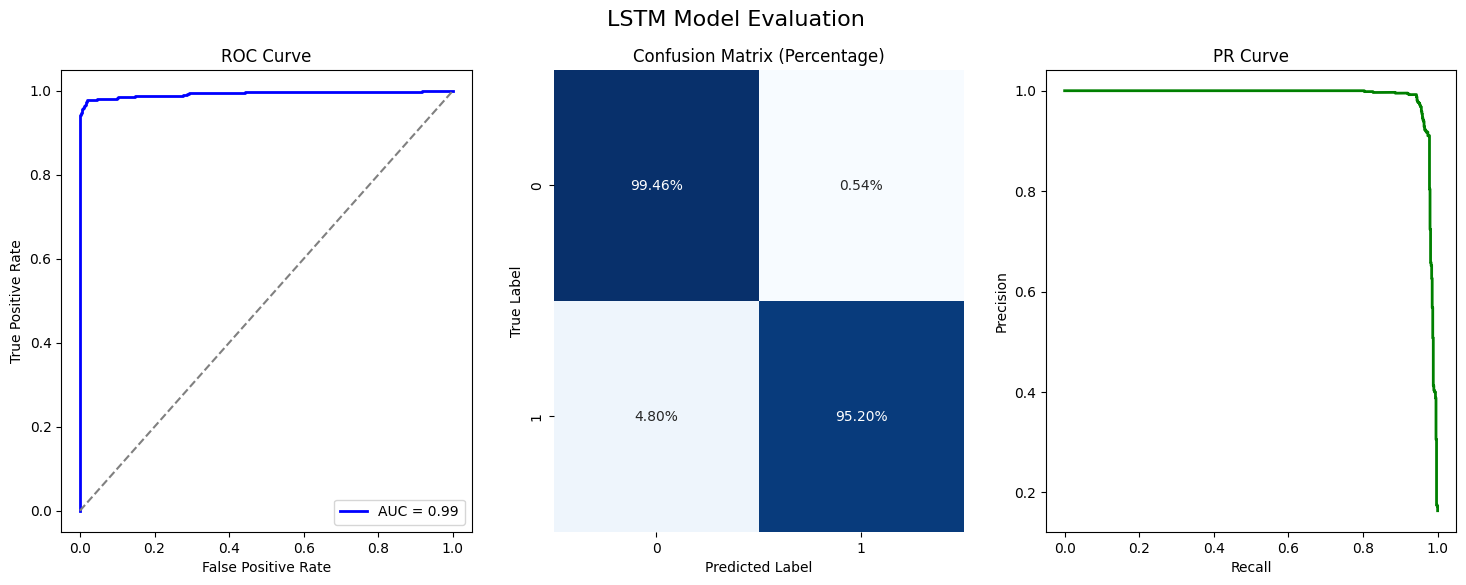

Training GRU model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8743 - loss: 0.3651 - val_accuracy: 0.9747 - val_loss: 0.1020
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9714 - loss: 0.0987 - val_accuracy: 0.9827 - val_loss: 0.0677
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9810 - loss: 0.0762 - val_accuracy: 0.9845 - val_loss: 0.0637
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9863 - loss: 0.0583 - val_accuracy: 0.9866 - val_loss: 0.0576
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9849 - loss: 0.0650 - val_accuracy: 0.9872 - val_loss: 0.0548
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
GRU Model - Accuracy: 0.9921, Precision: 0.9910, Recall: 0.9607, F1 Score: 0.9756


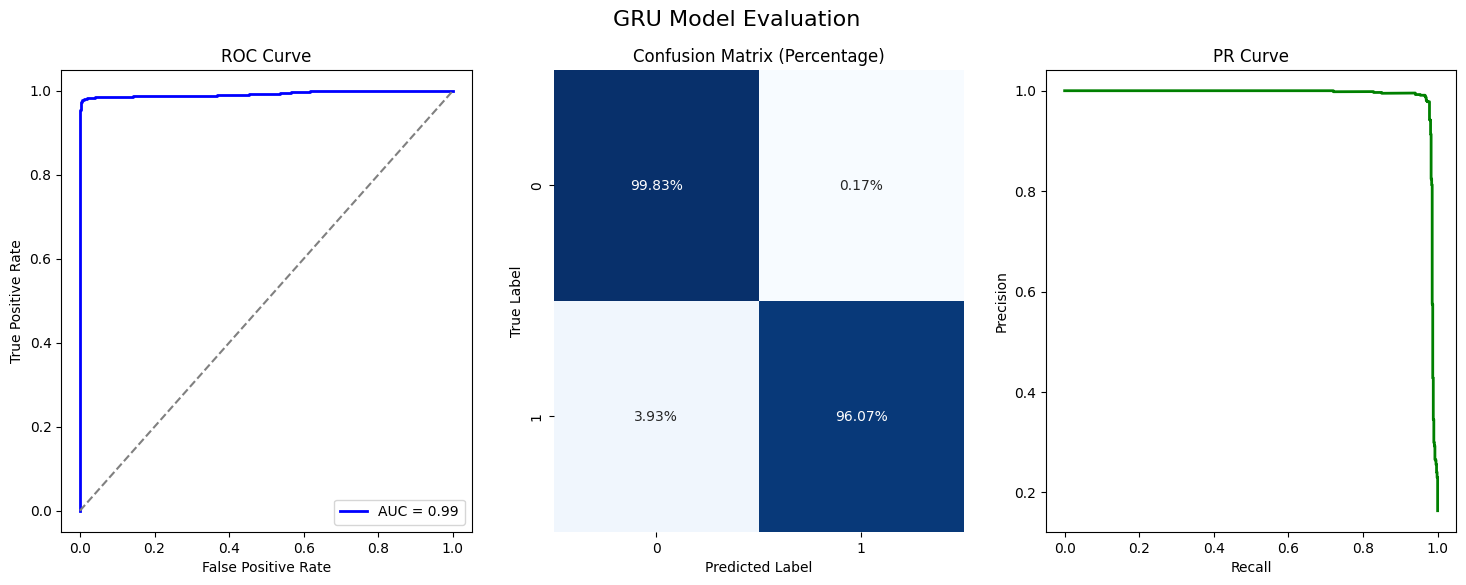

Training CNN-LSTM model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8654 - loss: 0.3983 - val_accuracy: 0.9408 - val_loss: 0.1459
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9552 - loss: 0.1249 - val_accuracy: 0.9765 - val_loss: 0.0778
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9724 - loss: 0.0899 - val_accuracy: 0.9819 - val_loss: 0.0664
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9798 - loss: 0.0712 - val_accuracy: 0.9863 - val_loss: 0.0592
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9808 - loss: 0.0681 - val_accuracy: 0.9786 - val_loss: 0.0673
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN-LSTM Model - Accuracy: 0.9515, Precision: 0.9979, Recall: 0.7045, F1 Score: 0.8259


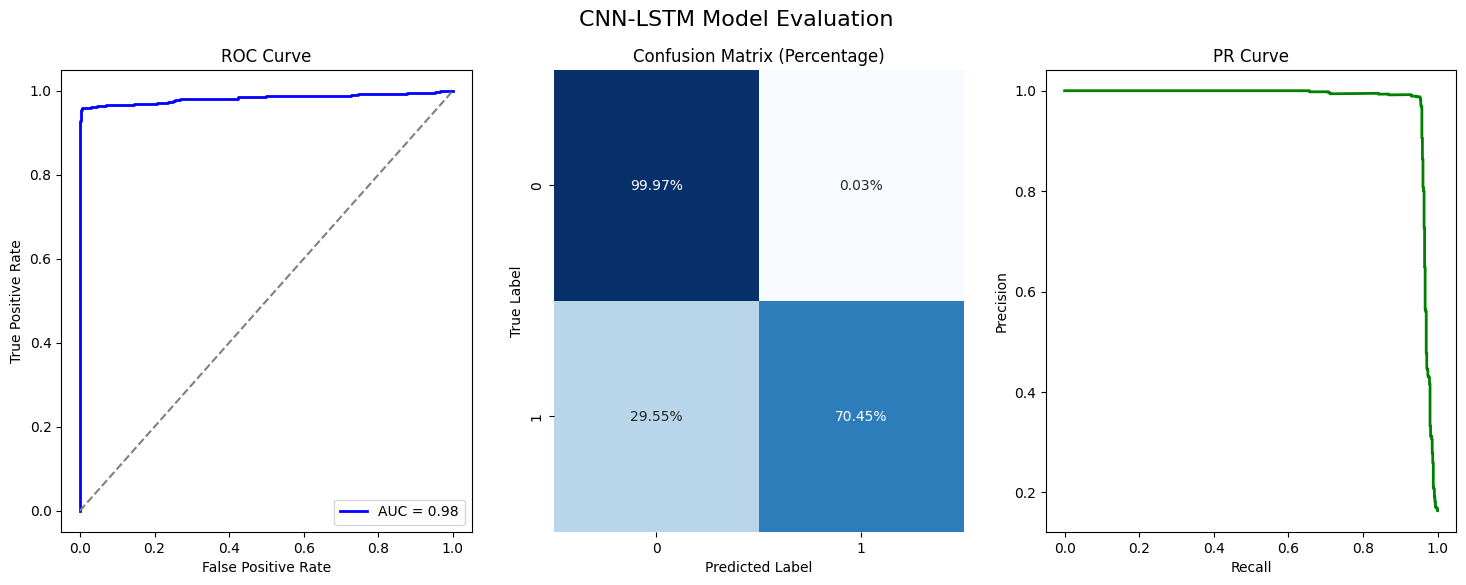


CNN Results:
accuracy: 0.9826
precision: 0.9936
recall: 0.8996
f1_score: 0.9442

LSTM Results:
accuracy: 0.9876
precision: 0.9718
recall: 0.9520
f1_score: 0.9618

GRU Results:
accuracy: 0.9921
precision: 0.9910
recall: 0.9607
f1_score: 0.9756

CNN-LSTM Results:
accuracy: 0.9515
precision: 0.9979
recall: 0.7045
f1_score: 0.8259


<ipython-input-18-bcdad2c1ab97>:258: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)


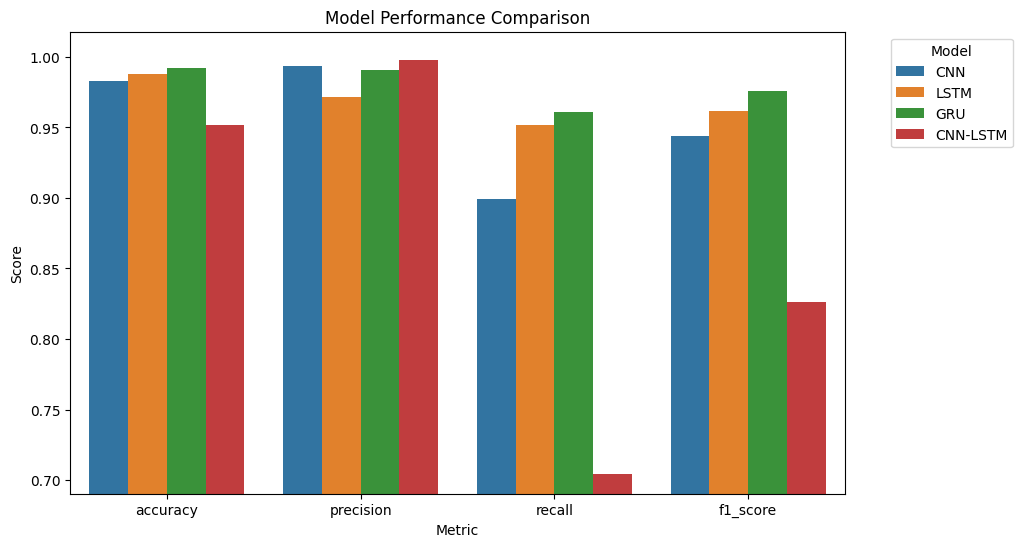

In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_JUN_P34.csv'
data = pd.read_csv(file_path,index_col=0)

data.index = pd.to_datetime(data.index)

# %%
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# %%
data.loc[data[target]==-1,target] = 0

# %%
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Extract the list of feature columns and remove the target column
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Define a function to create time-series data using a sliding window
def create_time_series(data, features, target, window_size=5):
    X, y = [], []  # Initialize empty lists for features and targets

    # Iterate over the data to extract sliding windows
    for i in range(len(data) - window_size):
        # Extract a window of feature values
        X_window = data[features].iloc[i:i + window_size].values
        # Get the target value at the end of the current window
        y_target = data[target].iloc[i + window_size]

        X.append(X_window)  # Store the extracted window in X
        y.append(y_target)  # Store the target value in y

    # Convert lists to NumPy arrays for better performance
    return np.array(X), np.array(y)

# Call the function to generate the input (X) and target (y) for the time series
X, y = create_time_series(data, features, target, window_size=5)

# Print the shapes of the resulting arrays
print(f'X shape: {X.shape}, y shape: {y.shape}')


# %%
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv1D, LSTM, GRU, Flatten, Dropout, MaxPooling1D, Input
)
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Reshape X to 2D: (samples, timesteps * features)
X_reshaped = X.reshape(X.shape[0], -1)

# Initialize the SMOTETomek sampler
smote_tomek = SMOTETomek(random_state=42,sampling_strategy=0.2)

# Apply SMOTETomek on the reshaped data
X_resampled, y_resampled = smote_tomek.fit_resample(X_reshaped, y)

# Reshape X back to its original 3D shape: (samples, timesteps, features)
timesteps = X.shape[1]
features = X.shape[2]
X_resampled = X_resampled.reshape(-1, timesteps, features)

# Print the shapes to verify the resampling
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print(f"Resampled X shape: {X_resampled.shape}, y shape: {y_resampled.shape}")

# Now split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 1. CNN Model
def build_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# 2. LSTM Model
def build_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# 3. GRU Model
def build_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# 4. CNN-LSTM Model (without TimeDistributed)
def build_cnn_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu',padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# List of models to build
models = {
    "CNN": build_cnn(X_train.shape[1:]),
    "LSTM": build_lstm(X_train.shape[1:]),
    "GRU": build_gru(X_train.shape[1:]),
    "CNN-LSTM": build_cnn_lstm(X_train.shape[1:])
}

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, precision_recall_curve
)
import seaborn as sns

# Loop through each model, compile, train, and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name} model...")

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict on the test set (probabilities)
    y_prob = model.predict(X_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)

    # Evaluate the model's performance
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results for each model
    results[name] = {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    print(f"{name} Model - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Create a figure with three subplots: ROC, Confusion Matrix, and PR curve
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # 1. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[0].set_title('ROC Curve')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].legend(loc='lower right')

    # 2. Confusion Matrix (as percentages)
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=ax[1])
    ax[1].set_title('Confusion Matrix (Percentage)')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    # 3. Precision-Recall (PR) Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    ax[2].plot(recall_vals, precision_vals, color='green', lw=2)
    ax[2].set_title('PR Curve')
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precision')

    # Save the figure as a high-resolution image
    plt.suptitle(f'{name} Model Evaluation', fontsize=16)
    plt.savefig(f'{name}_evaluation.png', dpi=300)

    # Show the plot (optional)
    plt.show()

# Output the final results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


# %%
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Convert results dictionary to DataFrame for easier plotting
df_results = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='metric', value_name='score')
df_results.rename(columns={'index': 'model'}, inplace=True)

# Determine y-axis range
min_score = df_results['score'].min() * 0.98
max_score = df_results['score'].max() * 1.02

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)

# Set y-axis limits
ax.set_ylim(min_score, max_score)

# Set plot labels and title
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')

# Show the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# BINARY Model Training Using Data Labeled by DBSCAN (361626)


In [ ]:
pip install dash dash-bootstrap-components pandas plotly

X shape: (17563, 5, 2), y shape: (17563,)
Original X shape: (17563, 5, 2), y shape: (17563,)
Resampled X shape: (21028, 5, 2), y shape: (21028,)
Training CNN model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9270 - loss: 0.3184 - val_accuracy: 0.9840 - val_loss: 0.0700
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0731 - val_accuracy: 0.9857 - val_loss: 0.0658
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0695 - val_accuracy: 0.9863 - val_loss: 0.0629
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0654 - val_accuracy: 0.9866 - val_loss: 0.0615
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9866 - loss: 0.0652 - val_accuracy: 0.9872 - val_loss: 0.0606
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN Model - Accuracy: 0.9848, Precision: 0.9952, Recall: 0.9108, F1 Score: 0.9511


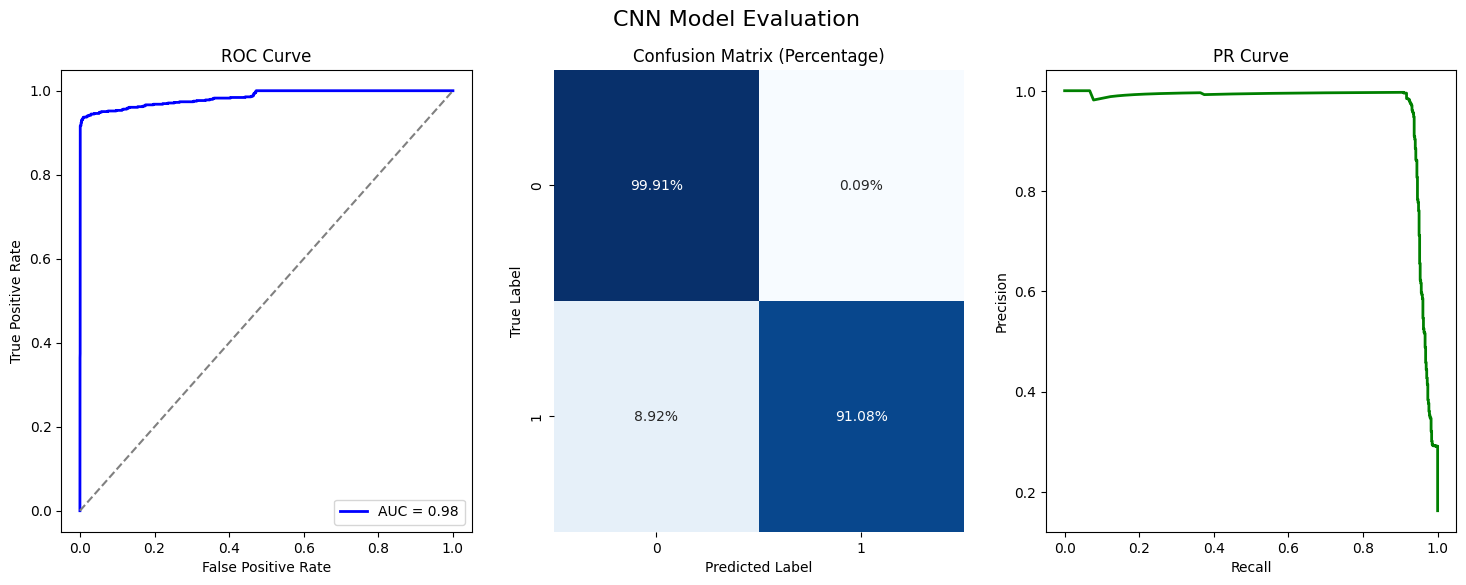

Training LSTM model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9429 - loss: 0.2729 - val_accuracy: 0.9896 - val_loss: 0.0518
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9873 - loss: 0.0464 - val_accuracy: 0.9932 - val_loss: 0.0248
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9936 - loss: 0.0275 - val_accuracy: 0.9961 - val_loss: 0.0198
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9941 - loss: 0.0275 - val_accuracy: 0.9964 - val_loss: 0.0189
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9950 - loss: 0.0208 - val_accuracy: 0.9964 - val_loss: 0.0183
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Model - Accuracy: 0.9938, Precision: 0.9985, Recall: 0.9635, F1 Score: 0.9807


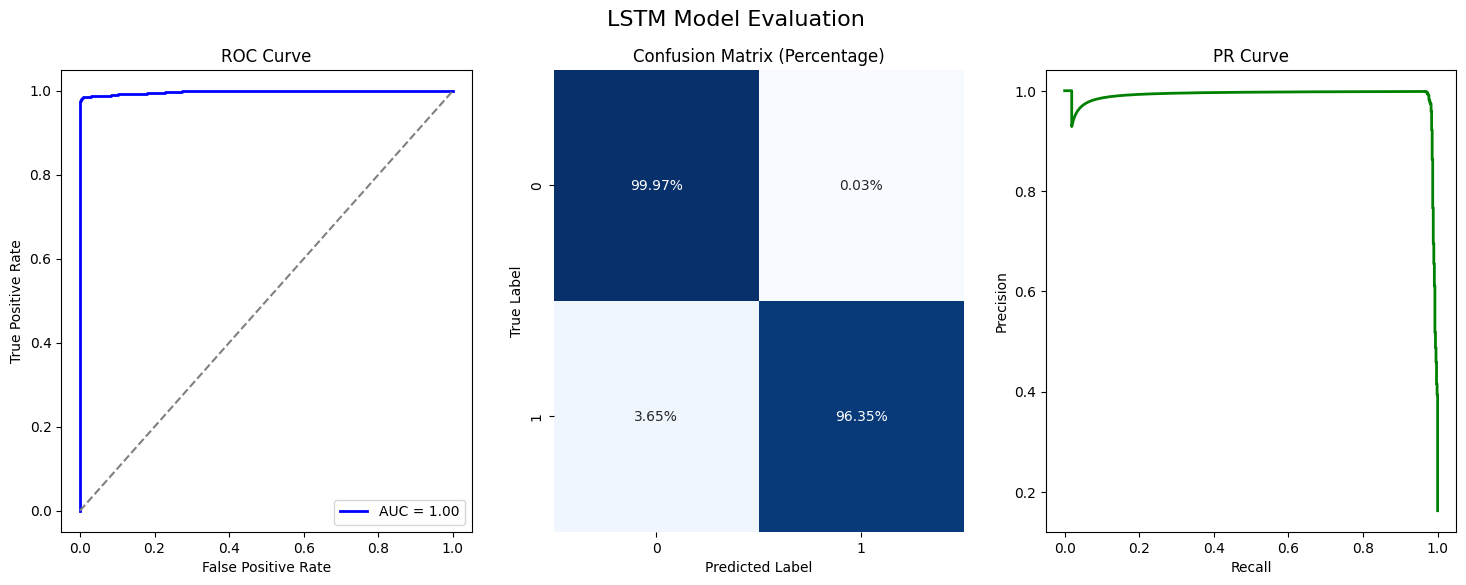

Training GRU model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9512 - loss: 0.2077 - val_accuracy: 0.9941 - val_loss: 0.0255
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9928 - loss: 0.0292 - val_accuracy: 0.9958 - val_loss: 0.0198
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9952 - loss: 0.0205 - val_accuracy: 0.9949 - val_loss: 0.0216
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9953 - loss: 0.0206 - val_accuracy: 0.9970 - val_loss: 0.0174
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9962 - loss: 0.0200 - val_accuracy: 0.9973 - val_loss: 0.0166
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
GRU Model - Accuracy: 0.9943, Precision: 0.9985, Recall: 0.9664, F1 Score: 0.9822


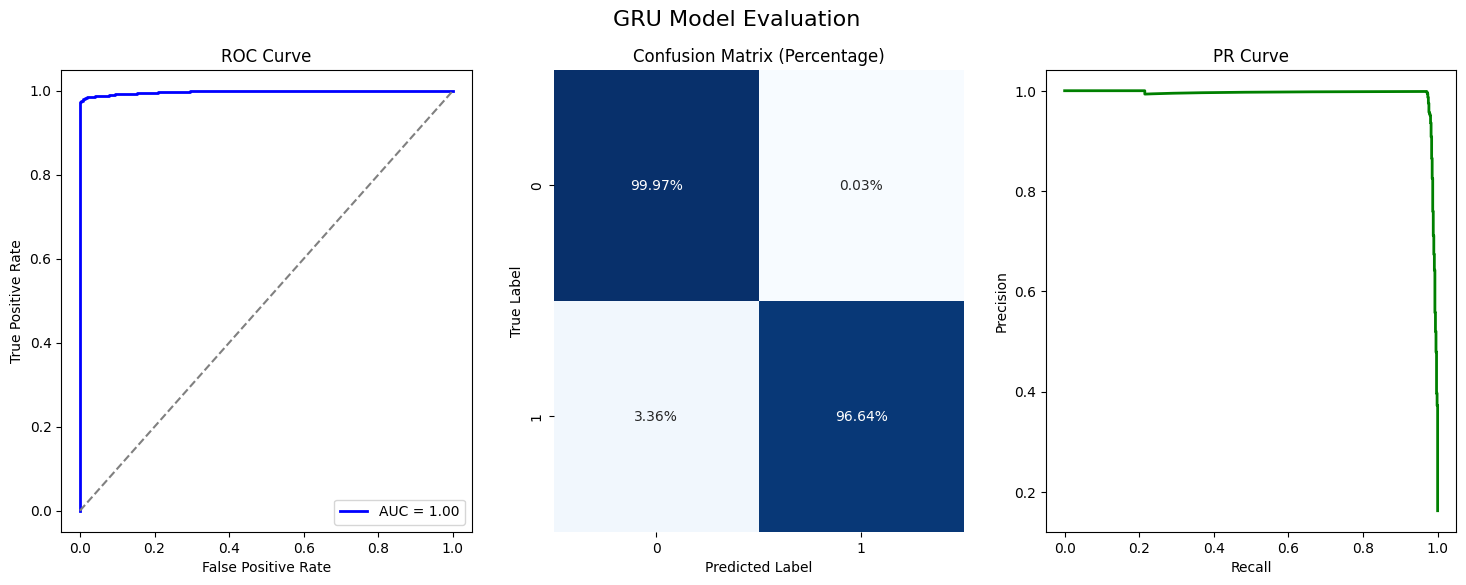

Training CNN-LSTM model...
Epoch 1/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9581 - loss: 0.3200 - val_accuracy: 0.9908 - val_loss: 0.0370
Epoch 2/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9911 - loss: 0.0372 - val_accuracy: 0.9955 - val_loss: 0.0230
Epoch 3/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9945 - loss: 0.0271 - val_accuracy: 0.9964 - val_loss: 0.0207
Epoch 4/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9942 - loss: 0.0258 - val_accuracy: 0.9964 - val_loss: 0.0200
Epoch 5/5
421/421 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9958 - loss: 0.0183 - val_accuracy: 0.9964 - val_loss: 0.0217
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN-LSTM Model - Accuracy: 0.9883, Precision: 0.9953, Recall: 0.9327, F1 Score: 0.9630


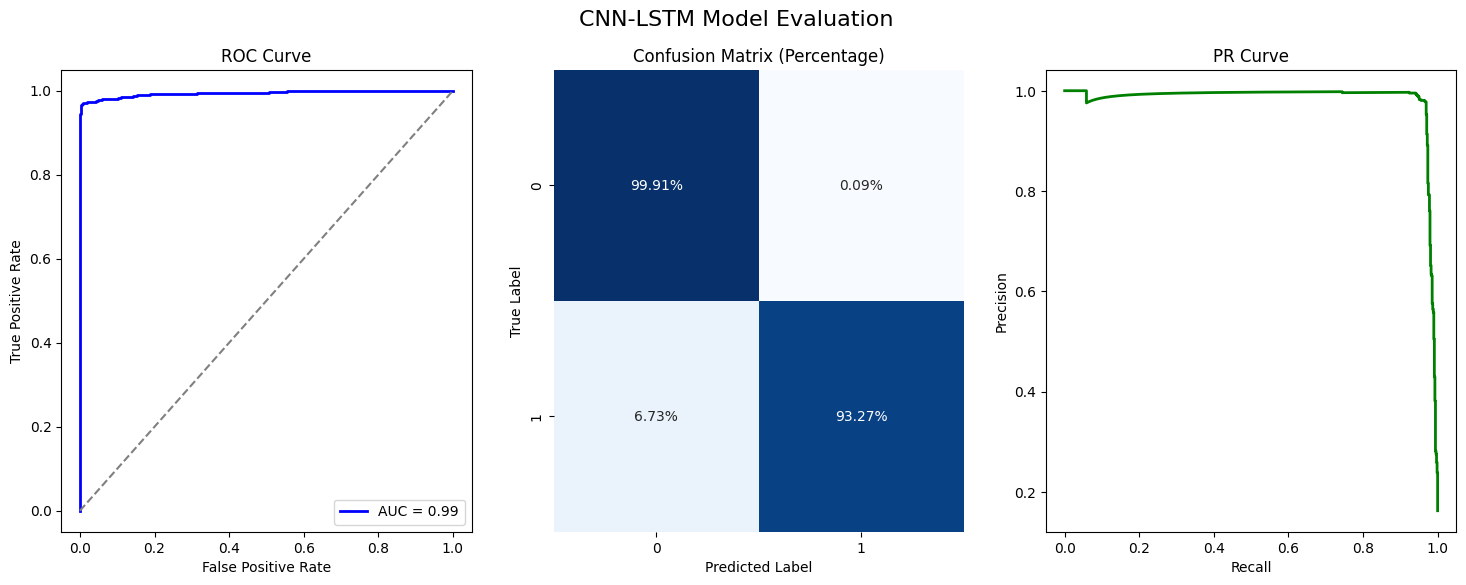


CNN Results:
accuracy: 0.9848
precision: 0.9952
recall: 0.9108
f1_score: 0.9511

LSTM Results:
accuracy: 0.9938
precision: 0.9985
recall: 0.9635
f1_score: 0.9807

GRU Results:
accuracy: 0.9943
precision: 0.9985
recall: 0.9664
f1_score: 0.9822

CNN-LSTM Results:
accuracy: 0.9883
precision: 0.9953
recall: 0.9327
f1_score: 0.9630


<ipython-input-20-6af3c73975eb>:258: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)


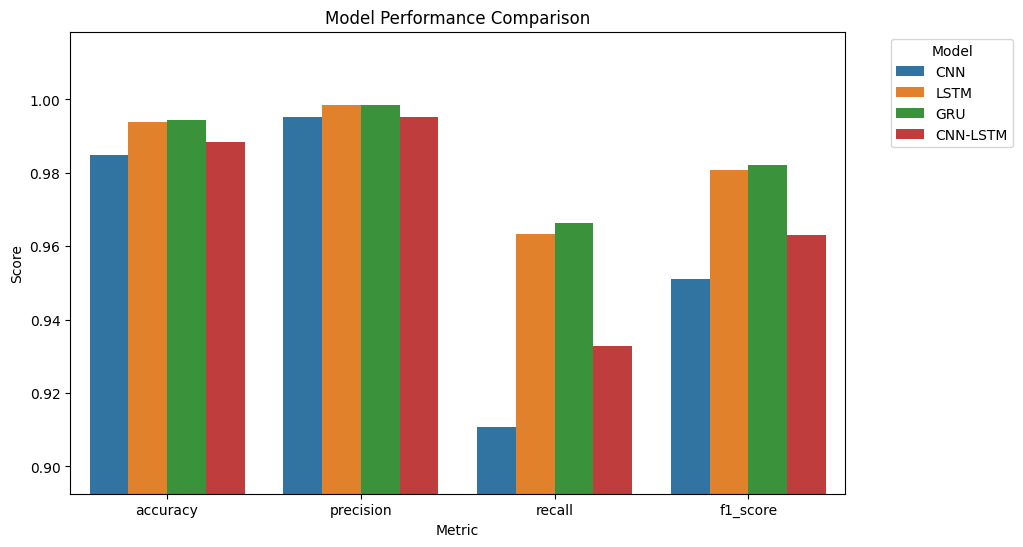

In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_361626.csv'
data = pd.read_csv(file_path,index_col=0)

data.index = pd.to_datetime(data.index)

# %%
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# %%
data.loc[data[target]==-1,target] = 0

# %%
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Extract the list of feature columns and remove the target column
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Define a function to create time-series data using a sliding window
def create_time_series(data, features, target, window_size=5):
    X, y = [], []  # Initialize empty lists for features and targets

    # Iterate over the data to extract sliding windows
    for i in range(len(data) - window_size):
        # Extract a window of feature values
        X_window = data[features].iloc[i:i + window_size].values
        # Get the target value at the end of the current window
        y_target = data[target].iloc[i + window_size]

        X.append(X_window)  # Store the extracted window in X
        y.append(y_target)  # Store the target value in y

    # Convert lists to NumPy arrays for better performance
    return np.array(X), np.array(y)

# Call the function to generate the input (X) and target (y) for the time series
X, y = create_time_series(data, features, target, window_size=5)

# Print the shapes of the resulting arrays
print(f'X shape: {X.shape}, y shape: {y.shape}')


# %%
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv1D, LSTM, GRU, Flatten, Dropout, MaxPooling1D, Input
)
from tensorflow.keras.callbacks import EarlyStopping

from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Reshape X to 2D: (samples, timesteps * features)
X_reshaped = X.reshape(X.shape[0], -1)

# Initialize the SMOTETomek sampler
smote_tomek = SMOTETomek(random_state=42,sampling_strategy=0.2)

# Apply SMOTETomek on the reshaped data
X_resampled, y_resampled = smote_tomek.fit_resample(X_reshaped, y)

# Reshape X back to its original 3D shape: (samples, timesteps, features)
timesteps = X.shape[1]
features = X.shape[2]
X_resampled = X_resampled.reshape(-1, timesteps, features)

# Print the shapes to verify the resampling
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print(f"Resampled X shape: {X_resampled.shape}, y shape: {y_resampled.shape}")

# Now split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 1. CNN Model
def build_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# 2. LSTM Model
def build_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# 3. GRU Model
def build_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# 4. CNN-LSTM Model (without TimeDistributed)
def build_cnn_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu',padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    return model

# List of models to build
models = {
    "CNN": build_cnn(X_train.shape[1:]),
    "LSTM": build_lstm(X_train.shape[1:]),
    "GRU": build_gru(X_train.shape[1:]),
    "CNN-LSTM": build_cnn_lstm(X_train.shape[1:])
}

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, precision_recall_curve
)
import seaborn as sns

# Loop through each model, compile, train, and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name} model...")

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict on the test set (probabilities)
    y_prob = model.predict(X_test).flatten()
    y_pred = (y_prob > 0.5).astype(int)

    # Evaluate the model's performance
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results for each model
    results[name] = {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    print(f"{name} Model - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Create a figure with three subplots: ROC, Confusion Matrix, and PR curve
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # 1. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax[0].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
    ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[0].set_title('ROC Curve')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].legend(loc='lower right')

    # 2. Confusion Matrix (as percentages)
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=ax[1])
    ax[1].set_title('Confusion Matrix (Percentage)')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    # 3. Precision-Recall (PR) Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
    ax[2].plot(recall_vals, precision_vals, color='green', lw=2)
    ax[2].set_title('PR Curve')
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precision')

    # Save the figure as a high-resolution image
    plt.suptitle(f'{name} Model Evaluation', fontsize=16)
    plt.savefig(f'{name}_evaluation.png', dpi=300)

    # Show the plot (optional)
    plt.show()

# Output the final results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


# %%
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Convert results dictionary to DataFrame for easier plotting
df_results = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='metric', value_name='score')
df_results.rename(columns={'index': 'model'}, inplace=True)

# Determine y-axis range
min_score = df_results['score'].min() * 0.98
max_score = df_results['score'].max() * 1.02

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)

# Set y-axis limits
ax.set_ylim(min_score, max_score)

# Set plot labels and title
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')

# Show the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

# MULTICLASS Model Training Using Data Labeled by DBSCAN (JUN_P34)

In [115]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/WTS_PROJECT/final_df_clean.csv')


data['Datetime'] = pd.to_datetime(data['Datetime'])

In [116]:
data.set_index("Datetime",inplace=True)

In [117]:
# Assuming you want to keep the following columns
column_to_keep = [

    #'JUN_P23',
    #'JUN_P34',
    #'JUN_P36'


    'JUN_P34',
    '381789-PNL5_JUN011-AMP',
    #'381789-PNL4_BISHOP_FORD_MEM_SCH-AMP',
    #'350659-PNL2_MEI_TAK_HOUSE-AMP'


    #'361626-PNL2_CHUI_YUEN_HSE-AMP',
    #'017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP',
    #'017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP',
    #'029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP',
    #'029256-PNLBA_2_BD_A-BD_B-AMP',
    #'029256-PNLBB_7_BD_B-BD_A-AMP'


]

# Drop all other columns from the DataFrame
data = data[column_to_keep]

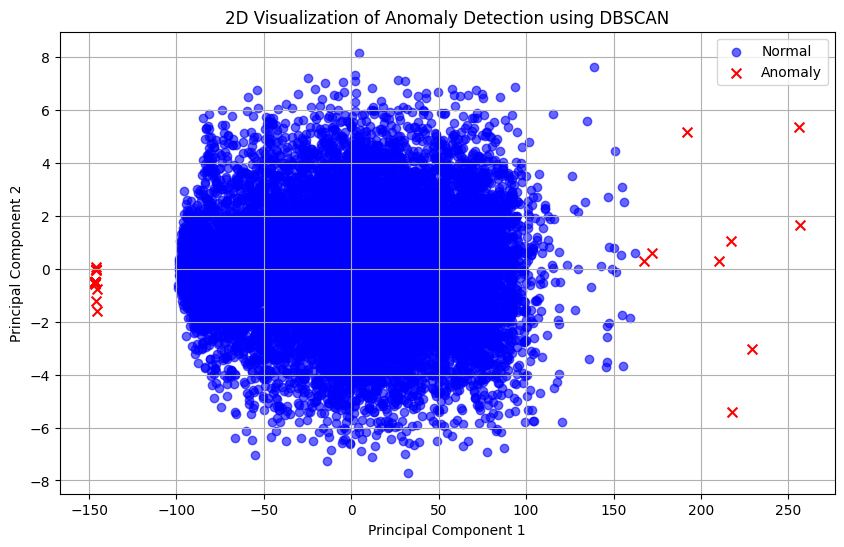

In [118]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=28, min_samples=48)  # Adjust these parameters if needed
labels = dbscan.fit_predict(data_2d)

# Step 3: Identify anomalies (noise points labeled as -1)
data['anomaly'] = (labels == -1).astype(int)  # 1 = Anomaly, 0 = Normal

# Separate normal and anomalous data for visualization
normal_data = data_2d[labels != -1]
anomalies = data_2d[labels == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()




In [119]:
#DataFrame to a CSV file

drive_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_JUN_P34_002.csv'

data.to_csv(drive_path)

## LOAD DF

In [120]:
import pandas as pd
file_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_JUN_P34_002.csv'
data = pd.read_csv(file_path,index_col=0)

data.index = pd.to_datetime(data.index)

# %%
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# %%
data.loc[data[target]==-1,target] = 0

In [121]:
import pandas as pd
import numpy as np

data['time_to_next_anomaly'] = None
anomaly_0_indices = data.index[data['anomaly'] == 0]
last_timestamp = data.index[-1]

for idx in data.index:
    if data.loc[idx, 'anomaly'] == 0:
        data.loc[idx, 'time_to_next_anomaly'] = 0
    elif data.loc[idx, 'anomaly'] == 1:
        future_anomalies = anomaly_0_indices[anomaly_0_indices > idx]
        if len(future_anomalies) > 0:
            next_anomaly_0_time = future_anomalies[0]
            time_difference = (next_anomaly_0_time - idx).total_seconds() / 60
            data.loc[idx, 'time_to_next_anomaly'] = time_difference
        else:
            data.loc[idx, 'time_to_next_anomaly'] = np.nan

data = data.dropna(subset=['time_to_next_anomaly']).copy()

In [122]:

# 获取 time_to_next_anomaly 列的最小值和最大值
min_value = data['time_to_next_anomaly'].dropna().min()
max_value = data['time_to_next_anomaly'].dropna().max()

# 计算各区间阈值
threshold_1 = min_value + (max_value - min_value) / 8
threshold_2 = min_value + (max_value - min_value) / 4
threshold_3 = min_value + (max_value - min_value) / 2

def assign_anomaly_category(row):
    if pd.isna(row['time_to_next_anomaly']):
        return row['anomaly']
    elif row['time_to_next_anomaly'] <= threshold_1:
        return 0
    elif row['time_to_next_anomaly'] <= threshold_2:
        return 1
    elif row['time_to_next_anomaly'] <= threshold_3:
        return 2
    else:
        return 3

data['anomaly'] = data.apply(assign_anomaly_category, axis=1)

print("Thresholds:", threshold_1, threshold_2, threshold_3, max_value)
print(data[['anomaly', 'time_to_next_anomaly']].head())

Thresholds: 82.5 165.0 330.0 660.0
                     anomaly time_to_next_anomaly
Datetime                                         
2023-06-24 00:00:00        0                    0
2023-06-24 00:30:00        0                    0
2023-06-24 01:00:00        0                    0
2023-06-24 01:30:00        0                    0
2023-06-24 02:00:00        0                    0


In [123]:
if 'time_to_next_anomaly' in data.columns:
    data = data.drop(columns =['time_to_next_anomaly'])

In [124]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Extract the list of feature columns and remove the target column
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Define a function to create time-series data using a sliding window
def create_time_series(data, features, target, window_size=5):
    X, y = [], []  # Initialize empty lists for features and targets

    # Iterate over the data to extract sliding windows
    for i in range(len(data) - window_size):
        # Extract a window of feature values
        X_window = data[features].iloc[i:i + window_size].values
        # Get the target value at the end of the current window
        y_target = data[target].iloc[i + window_size]

        X.append(X_window)  # Store the extracted window in X
        y.append(y_target)  # Store the target value in y

    # Convert lists to NumPy arrays for better performance
    return np.array(X), np.array(y)

# Call the function to generate the input (X) and target (y) for the time series
X, y = create_time_series(data, features, target, window_size=5)

# Print the shapes of the resulting arrays
print(f'X shape: {X.shape}, y shape: {y.shape}')


X shape: (17563, 5, 2), y shape: (17563,)


In [125]:
import numpy as np
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Reshape X to 2D: (samples, timesteps * features)
X_reshaped = X.reshape(X.shape[0], -1)


from imblearn.combine import SMOTETomek
from collections import Counter


from collections import Counter

# 统计各类别的样本数
class_counts = Counter(y)
max_class_count = max(class_counts.values())

# 定义需要处理的少数类别
minority_classes = [1, 2, 3]  # 替换为实际的少数类别标签

# 设置采样策略，只对少数类别进行处理
sampling_strategy = {
    class_label: max(int(max_class_count * 0.05), class_counts[class_label])
    for class_label in minority_classes
}

print("Sampling strategy:", sampling_strategy)


smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)


# Apply SMOTETomek on the reshaped data
X_resampled, y_resampled = smote_tomek.fit_resample(X_reshaped, y)

# Reshape X back to its original 3D shape: (samples, timesteps, features)
timesteps = X.shape[1]
features = X.shape[2]
X_resampled = X_resampled.reshape(-1, timesteps, features)

# Print the shapes to verify the resampling
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print(f"Resampled X shape: {X_resampled.shape}, y shape: {y_resampled.shape}")

# Now split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


from collections import Counter
Counter(y_resampled)

Sampling strategy: {1: 876, 2: 876, 3: 876}
Original X shape: (17563, 5, 2), y shape: (17563,)
Resampled X shape: (20069, 5, 2), y shape: (20069,)


Counter({0: 17492, 2: 854, 1: 859, 3: 864})

In [126]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

# 1. CNN Model
def build_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 2. LSTM Model
def build_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 3. GRU Model
def build_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 4. CNN-LSTM Model (without TimeDistributed)
def build_cnn_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# List of models to build
models = {
    "CNN": build_cnn(X_train.shape[1:]),
    "LSTM": build_lstm(X_train.shape[1:]),
    "GRU": build_gru(X_train.shape[1:]),
    "CNN-LSTM": build_cnn_lstm(X_train.shape[1:])
}


Training CNN model...
Epoch 1/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8573 - loss: 0.6417 - val_accuracy: 0.9013 - val_loss: 0.3416
Epoch 2/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9174 - loss: 0.2962 - val_accuracy: 0.9047 - val_loss: 0.2934
Epoch 3/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9186 - loss: 0.2443 - val_accuracy: 0.9059 - val_loss: 0.2567
Epoch 4/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9140 - loss: 0.2477 - val_accuracy: 0.9066 - val_loss: 0.2498
Epoch 5/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9196 - loss: 0.2305 - val_accuracy: 0.9103 - val_loss: 0.2449
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
CNN Model - Accuracy: 0.9131, Precision: 0.9230, Recall: 0.9131, F1 Score: 0.8965


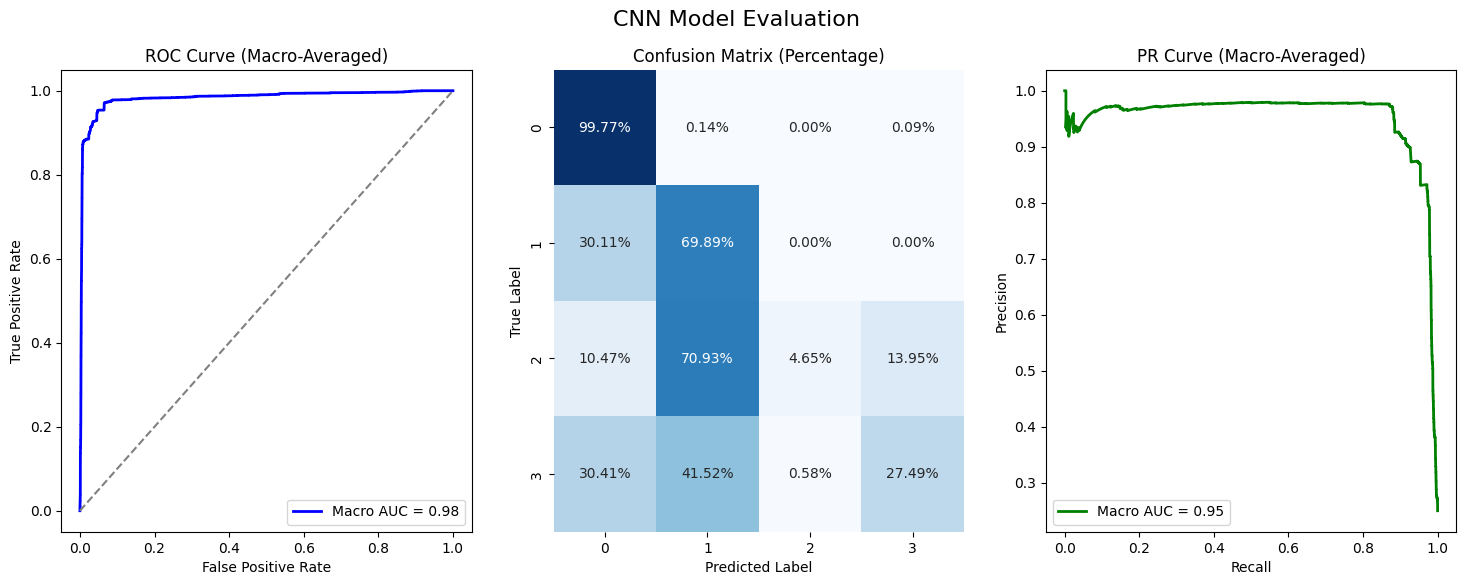

Training LSTM model...
Epoch 1/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8609 - loss: 0.5993 - val_accuracy: 0.8888 - val_loss: 0.3589
Epoch 2/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9066 - loss: 0.3223 - val_accuracy: 0.8891 - val_loss: 0.3454
Epoch 3/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9063 - loss: 0.3179 - val_accuracy: 0.8916 - val_loss: 0.3029
Epoch 4/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9093 - loss: 0.2585 - val_accuracy: 0.9116 - val_loss: 0.2371
Epoch 5/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9225 - loss: 0.2184 - val_accuracy: 0.9175 - val_loss: 0.2260
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
LSTM Model - Accuracy: 0.9225, Precision: 0.9371, Recall: 0.9225, F1 Score: 0.9095


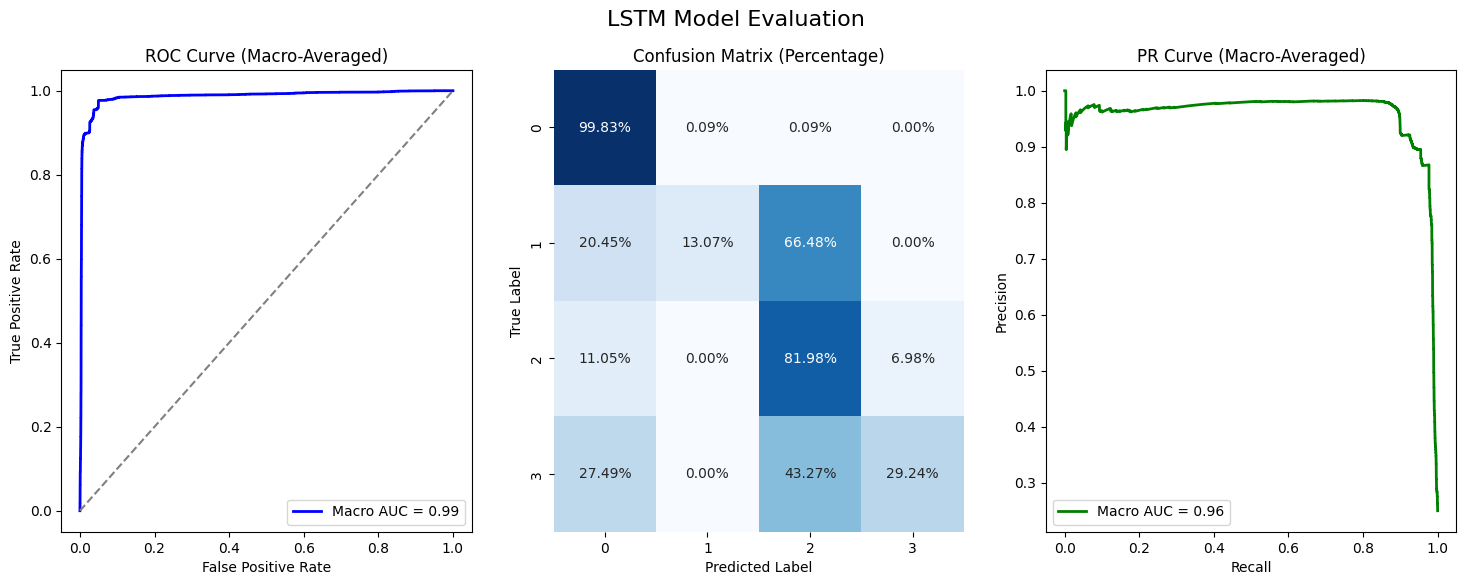

Training GRU model...
Epoch 1/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8832 - loss: 0.5159 - val_accuracy: 0.9091 - val_loss: 0.2686
Epoch 2/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9179 - loss: 0.2368 - val_accuracy: 0.9137 - val_loss: 0.2139
Epoch 3/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9263 - loss: 0.1998 - val_accuracy: 0.9193 - val_loss: 0.1978
Epoch 4/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9289 - loss: 0.1846 - val_accuracy: 0.9228 - val_loss: 0.1884
Epoch 5/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9289 - loss: 0.1834 - val_accuracy: 0.9249 - val_loss: 0.1839
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
GRU Model - Accuracy: 0.9320, Precision: 0.9507, Recall: 0.9320, F1 Score: 0.9230


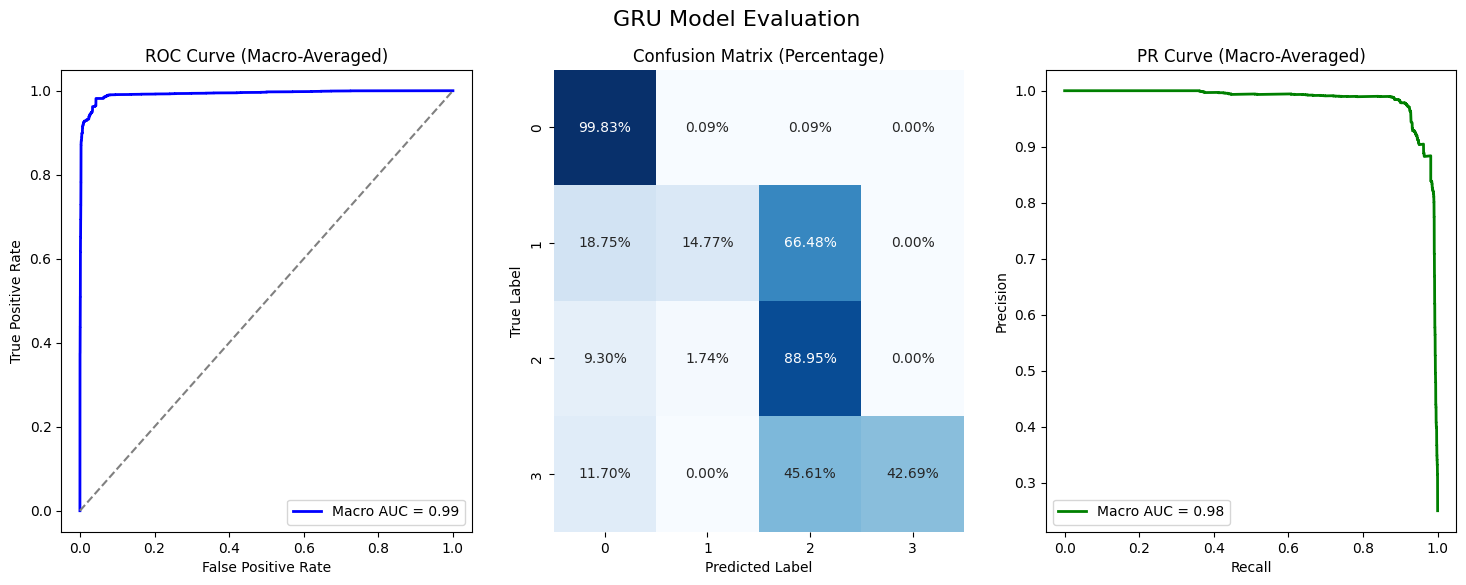

Training CNN-LSTM model...
Epoch 1/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8394 - loss: 0.6235 - val_accuracy: 0.8926 - val_loss: 0.3351
Epoch 2/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9093 - loss: 0.2840 - val_accuracy: 0.9069 - val_loss: 0.2588
Epoch 3/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9166 - loss: 0.2353 - val_accuracy: 0.9128 - val_loss: 0.2243
Epoch 4/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9234 - loss: 0.2103 - val_accuracy: 0.9137 - val_loss: 0.2170
Epoch 5/5
402/402 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9230 - loss: 0.2083 - val_accuracy: 0.9140 - val_loss: 0.2137
126/126 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
CNN-LSTM Model - Accuracy: 0.9038, Precision: 0.8770, Recall: 0.9038, F1 Score: 0.8771


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


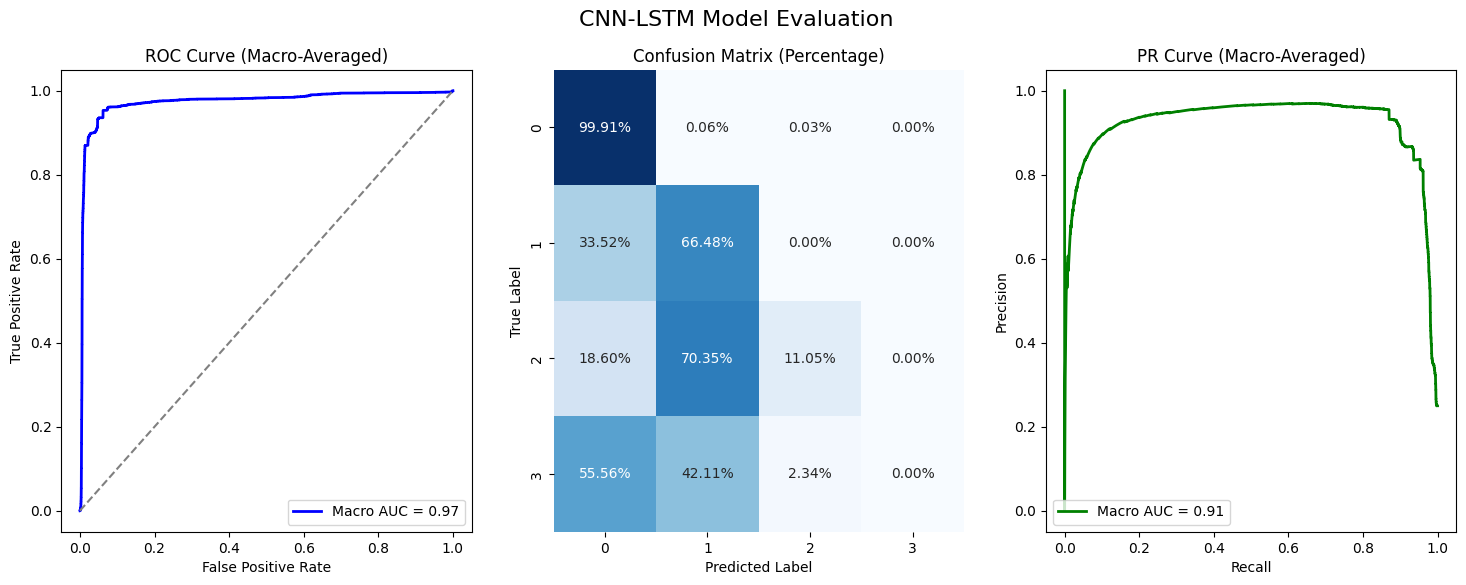


CNN Results:
accuracy: 0.9131
precision: 0.9230
recall: 0.9131
f1_score: 0.8965

LSTM Results:
accuracy: 0.9225
precision: 0.9371
recall: 0.9225
f1_score: 0.9095

GRU Results:
accuracy: 0.9320
precision: 0.9507
recall: 0.9320
f1_score: 0.9230

CNN-LSTM Results:
accuracy: 0.9038
precision: 0.8770
recall: 0.9038
f1_score: 0.8771


In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Initialize LabelBinarizer for multi-class transformation
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Loop through each model, compile, train, and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name} model...")

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict probabilities on the test set
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    print(f"{name} Model - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Create a figure with three subplots: ROC, Confusion Matrix, and PR curve
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # ROC Curve for each class with macro-averaged AUC
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(lb.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    ax[0].plot(fpr["macro"], tpr["macro"], color='blue', lw=2, label=f'Macro AUC = {roc_auc["macro"]:.2f}')
    ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[0].set_title('ROC Curve (Macro-Averaged)')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].legend(loc='lower right')

    # Confusion Matrix as percentages
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=ax[1])
    ax[1].set_title('Confusion Matrix (Percentage)')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    # Precision-Recall Curve for each class with macro-averaged AUC
    precision_vals = {}
    recall_vals = {}
    pr_auc = {}
    for i in range(len(lb.classes_)):
        precision_vals[i], recall_vals[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        pr_auc[i] = auc(recall_vals[i], precision_vals[i])
    precision_vals["macro"], recall_vals["macro"], _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
    pr_auc["macro"] = auc(recall_vals["macro"], precision_vals["macro"])

    ax[2].plot(recall_vals["macro"], precision_vals["macro"], color='green', lw=2, label=f'Macro AUC = {pr_auc["macro"]:.2f}')
    ax[2].set_title('PR Curve (Macro-Averaged)')
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precision')
    ax[2].legend(loc='lower left')

    # Save the figure as a high-resolution image
    plt.suptitle(f'{name} Model Evaluation', fontsize=16)
    plt.savefig(f'{name}_evaluation.png', dpi=300)
    plt.show()

# Output final results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


<ipython-input-128-9f158051246e>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)


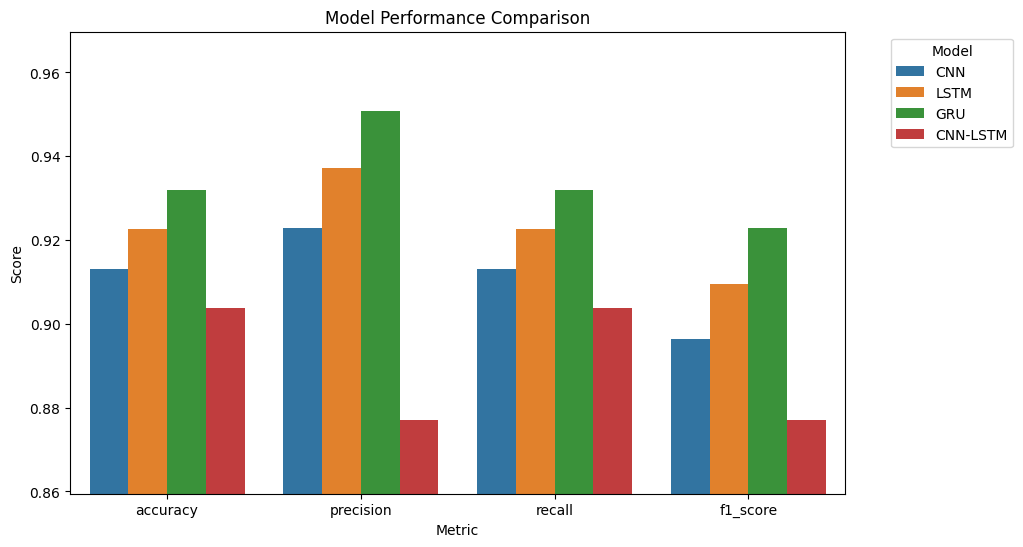

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Convert results dictionary to DataFrame for easier plotting
df_results = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='metric', value_name='score')
df_results.rename(columns={'index': 'model'}, inplace=True)

# Determine y-axis range
min_score = df_results['score'].min() * 0.98
max_score = df_results['score'].max() * 1.02

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)

# Set y-axis limits
ax.set_ylim(min_score, max_score)

# Set plot labels and title
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')

# Show the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# MULTICLASS Model Training Using Data Labeled by IsolationForest (JUN_P34)

In [95]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/WTS_PROJECT/final_df_clean.csv')


data['Datetime'] = pd.to_datetime(data['Datetime'])

In [96]:
data.set_index("Datetime",inplace=True)

In [97]:
# Assuming you want to keep the following columns
column_to_keep = [

    #'JUN_P23',
    #'JUN_P34',
    #'JUN_P36'


    'JUN_P34',
    '381789-PNL5_JUN011-AMP',
    #'381789-PNL4_BISHOP_FORD_MEM_SCH-AMP',
    #'350659-PNL2_MEI_TAK_HOUSE-AMP'


    #'361626-PNL2_CHUI_YUEN_HSE-AMP',
    #'017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP',
    #'017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP',
    #'029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP',
    #'029256-PNLBA_2_BD_A-BD_B-AMP',
    #'029256-PNLBB_7_BD_B-BD_A-AMP'


]

# Drop all other columns from the DataFrame
data = data[column_to_keep]

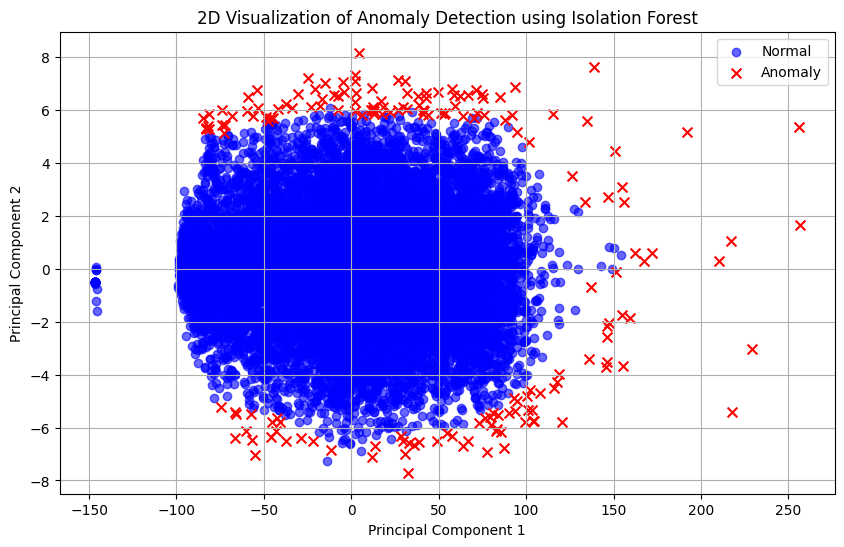

In [98]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply Isolation Forest for anomaly detection
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
anomaly_labels = model.fit_predict(data_2d)  # Predict anomalies

# Step 3: Separate normal and anomalous data
data['anomaly'] = anomaly_labels
normal_data = data_2d[data['anomaly'] == 1]
anomalies = data_2d[data['anomaly'] == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using Isolation Forest')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()



In [99]:
#DataFrame to a CSV file

drive_path = '/content/drive/My Drive/WTS_PROJECT/IsolationForest_Labeled_data_JUN_P34_002.csv'

data.to_csv(drive_path)

## LOAD DF

In [100]:
import pandas as pd
file_path = '/content/drive/My Drive/WTS_PROJECT/IsolationForest_Labeled_data_JUN_P34_002.csv'
data = pd.read_csv(file_path,index_col=0)

data.index = pd.to_datetime(data.index)

data['anomaly'].value_counts()

features = data.columns.tolist()
target = 'anomaly'
features.remove(target)
data.loc[data[target]==-1,target] = 0

In [101]:
# Calculate the number of unique values in each column
unique_counts = data.nunique()

# Print the number of unique values per column
print(unique_counts)

JUN_P34                   8033
381789-PNL5_JUN011-AMP    7202
anomaly                      2
dtype: int64


In [102]:
import pandas as pd
import numpy as np

data['time_to_next_anomaly'] = None
anomaly_0_indices = data.index[data['anomaly'] == 0]
last_timestamp = data.index[-1]

for idx in data.index:
    if data.loc[idx, 'anomaly'] == 0:
        data.loc[idx, 'time_to_next_anomaly'] = 0
    elif data.loc[idx, 'anomaly'] == 1:
        future_anomalies = anomaly_0_indices[anomaly_0_indices > idx]
        if len(future_anomalies) > 0:
            next_anomaly_0_time = future_anomalies[0]
            time_difference = (next_anomaly_0_time - idx).total_seconds() / 60
            data.loc[idx, 'time_to_next_anomaly'] = time_difference
        else:
            data.loc[idx, 'time_to_next_anomaly'] = np.nan

data = data.dropna(subset=['time_to_next_anomaly']).copy()

In [103]:
# Calculate the number of unique values in each column
unique_counts = data.nunique()

# Print the number of unique values per column
print(unique_counts)

JUN_P34                   8023
381789-PNL5_JUN011-AMP    7195
anomaly                      2
time_to_next_anomaly       619
dtype: int64


In [104]:
# Calculate the number of non-null records in each column
record_counts = data.count()

# Print the number of non-null records per column
print(record_counts)

JUN_P34                   17518
381789-PNL5_JUN011-AMP    17518
anomaly                   17518
time_to_next_anomaly      17518
dtype: int64


In [105]:
data.head(5)

JUN_P34  381789-PNL5_JUN011-AMP  anomaly  \
Datetime                                                        
2023-06-24 00:00:00   122.45                  125.35        1   
2023-06-24 00:30:00   124.98                  121.28        1   
2023-06-24 01:00:00   111.40                  114.02        1   
2023-06-24 01:30:00   109.70                  110.80        1   
2023-06-24 02:00:00   108.11                  107.32        1   

                    time_to_next_anomaly  
Datetime                                  
2023-06-24 00:00:00               2100.0  
2023-06-24 00:30:00               2070.0  
2023-06-24 01:00:00               2040.0  
2023-06-24 01:30:00               2010.0  
2023-06-24 02:00:00               1980.0

In [106]:

# 获取 time_to_next_anomaly 列的最小值和最大值
min_value = data['time_to_next_anomaly'].dropna().min()
max_value = data['time_to_next_anomaly'].dropna().max()

# 计算各区间阈值
threshold_1 = min_value + (max_value - min_value) / 8
threshold_2 = min_value + (max_value - min_value) / 4
threshold_3 = min_value + (max_value - min_value) / 2

def assign_anomaly_category(row):
    if pd.isna(row['time_to_next_anomaly']):
        return row['anomaly']
    elif row['time_to_next_anomaly'] <= threshold_1:
        return 0
    elif row['time_to_next_anomaly'] <= threshold_2:
        return 1
    elif row['time_to_next_anomaly'] <= threshold_3:
        return 2
    else:
        return 3

data['anomaly'] = data.apply(assign_anomaly_category, axis=1)

print("Thresholds:", threshold_1, threshold_2, threshold_3, max_value)
print(data[['anomaly', 'time_to_next_anomaly']].head())

Thresholds: 2317.5 4635.0 9270.0 18540.0
                     anomaly time_to_next_anomaly
Datetime                                         
2023-06-24 00:00:00        0               2100.0
2023-06-24 00:30:00        0               2070.0
2023-06-24 01:00:00        0               2040.0
2023-06-24 01:30:00        0               2010.0
2023-06-24 02:00:00        0               1980.0


In [107]:
if 'time_to_next_anomaly' in data.columns:
    data = data.drop(columns =['time_to_next_anomaly'])

In [108]:
# Calculate the number of unique values in each column
unique_counts = data.nunique()

# Print the number of unique values per column
print(unique_counts)

JUN_P34                   8023
381789-PNL5_JUN011-AMP    7195
anomaly                      4
dtype: int64


In [109]:
data.head(5)

JUN_P34  381789-PNL5_JUN011-AMP  anomaly
Datetime                                                     
2023-06-24 00:00:00   122.45                  125.35        0
2023-06-24 00:30:00   124.98                  121.28        0
2023-06-24 01:00:00   111.40                  114.02        0
2023-06-24 01:30:00   109.70                  110.80        0
2023-06-24 02:00:00   108.11                  107.32        0

In [110]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Extract the list of feature columns and remove the target column
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Define a function to create time-series data using a sliding window
def create_time_series(data, features, target, window_size=5):
    X, y = [], []  # Initialize empty lists for features and targets

    # Iterate over the data to extract sliding windows
    for i in range(len(data) - window_size):
        # Extract a window of feature values
        X_window = data[features].iloc[i:i + window_size].values
        # Get the target value at the end of the current window
        y_target = data[target].iloc[i + window_size]

        X.append(X_window)  # Store the extracted window in X
        y.append(y_target)  # Store the target value in y

    # Convert lists to NumPy arrays for better performance
    return np.array(X), np.array(y)

# Call the function to generate the input (X) and target (y) for the time series
X, y = create_time_series(data, features, target, window_size=5)

# Print the shapes of the resulting arrays
print(f'X shape: {X.shape}, y shape: {y.shape}')


X shape: (17513, 5, 2), y shape: (17513,)


In [111]:
import numpy as np
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Reshape X to 2D: (samples, timesteps * features)
X_reshaped = X.reshape(X.shape[0], -1)


from imblearn.combine import SMOTETomek
from collections import Counter


from collections import Counter

# 统计各类别的样本数
class_counts = Counter(y)
max_class_count = max(class_counts.values())

# 定义需要处理的少数类别
minority_classes = [1, 2, 3]  # 替换为实际的少数类别标签

# 设置采样策略，只对少数类别进行处理
sampling_strategy = {
    class_label: max(int(max_class_count * 0.05), class_counts[class_label])
    for class_label in minority_classes
}

print("Sampling strategy:", sampling_strategy)


smote_tomek = SMOTETomek(sampling_strategy=sampling_strategy, random_state=42)


# Apply SMOTETomek on the reshaped data
X_resampled, y_resampled = smote_tomek.fit_resample(X_reshaped, y)

# Reshape X back to its original 3D shape: (samples, timesteps, features)
timesteps = X.shape[1]
features = X.shape[2]
X_resampled = X_resampled.reshape(-1, timesteps, features)

# Print the shapes to verify the resampling
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print(f"Resampled X shape: {X_resampled.shape}, y shape: {y_resampled.shape}")

# Now split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)


from collections import Counter
Counter(y_resampled)

Sampling strategy: {1: 3843, 2: 3808, 3: 1554}
Original X shape: (17513, 5, 2), y shape: (17513,)
Resampled X shape: (12783, 5, 2), y shape: (12783,)


Counter({0: 6527, 1: 2624, 3: 1006, 2: 2626})

In [112]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

# 1. CNN Model
def build_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 2. LSTM Model
def build_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 3. GRU Model
def build_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 4. CNN-LSTM Model (without TimeDistributed)
def build_cnn_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# List of models to build
models = {
    "CNN": build_cnn(X_train.shape[1:]),
    "LSTM": build_lstm(X_train.shape[1:]),
    "GRU": build_gru(X_train.shape[1:]),
    "CNN-LSTM": build_cnn_lstm(X_train.shape[1:])
}


Training CNN model...
Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4841 - loss: 1.2486 - val_accuracy: 0.5108 - val_loss: 1.2005
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5115 - loss: 1.1922 - val_accuracy: 0.5108 - val_loss: 1.2003
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5107 - loss: 1.1983 - val_accuracy: 0.5108 - val_loss: 1.1988
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5163 - loss: 1.1913 - val_accuracy: 0.5108 - val_loss: 1.2007
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5075 - loss: 1.1973 - val_accuracy: 0.5108 - val_loss: 1.1996
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN Model - Accuracy: 0.5158, Precision: 0.2661, Recall: 0.5158, F1 Score: 0.3511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


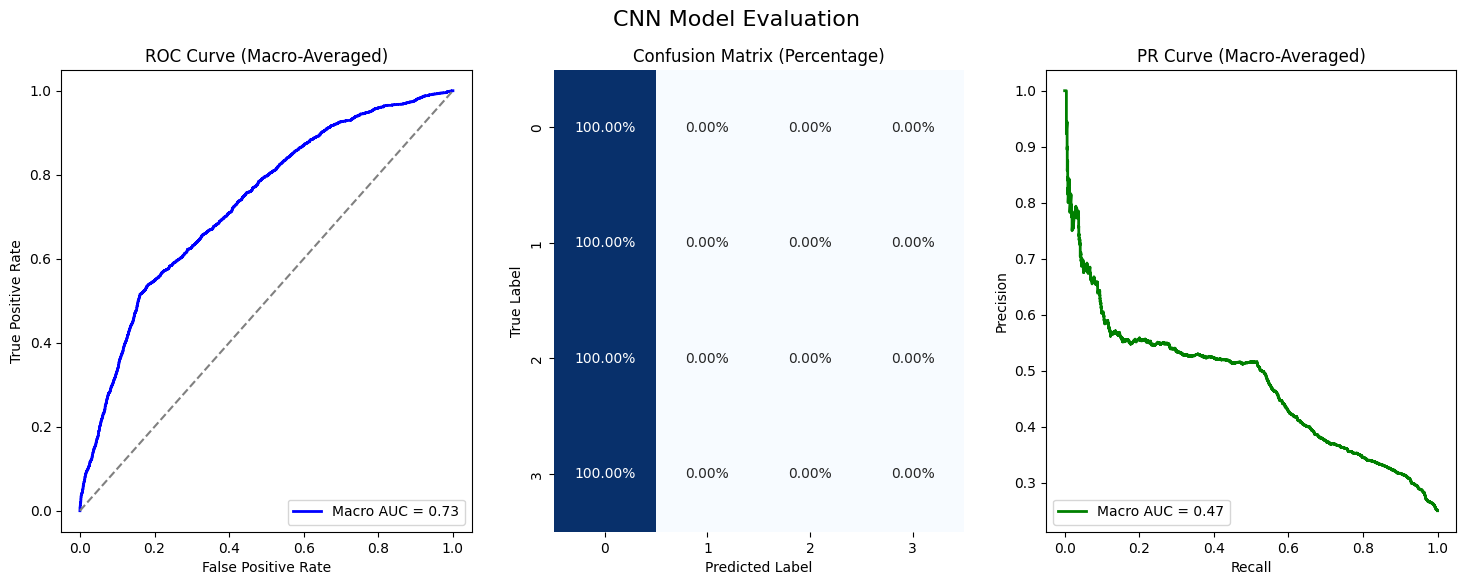

Training LSTM model...
Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4823 - loss: 1.2443 - val_accuracy: 0.5108 - val_loss: 1.2007
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5026 - loss: 1.2020 - val_accuracy: 0.5108 - val_loss: 1.2028
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5032 - loss: 1.2074 - val_accuracy: 0.5108 - val_loss: 1.2075
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5138 - loss: 1.1884 - val_accuracy: 0.5108 - val_loss: 1.2003
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5169 - loss: 1.1857 - val_accuracy: 0.5108 - val_loss: 1.1987
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM Model - Accuracy: 0.5158, Precision: 0.2661, Recall: 0.5158, F1 Score: 0.3511


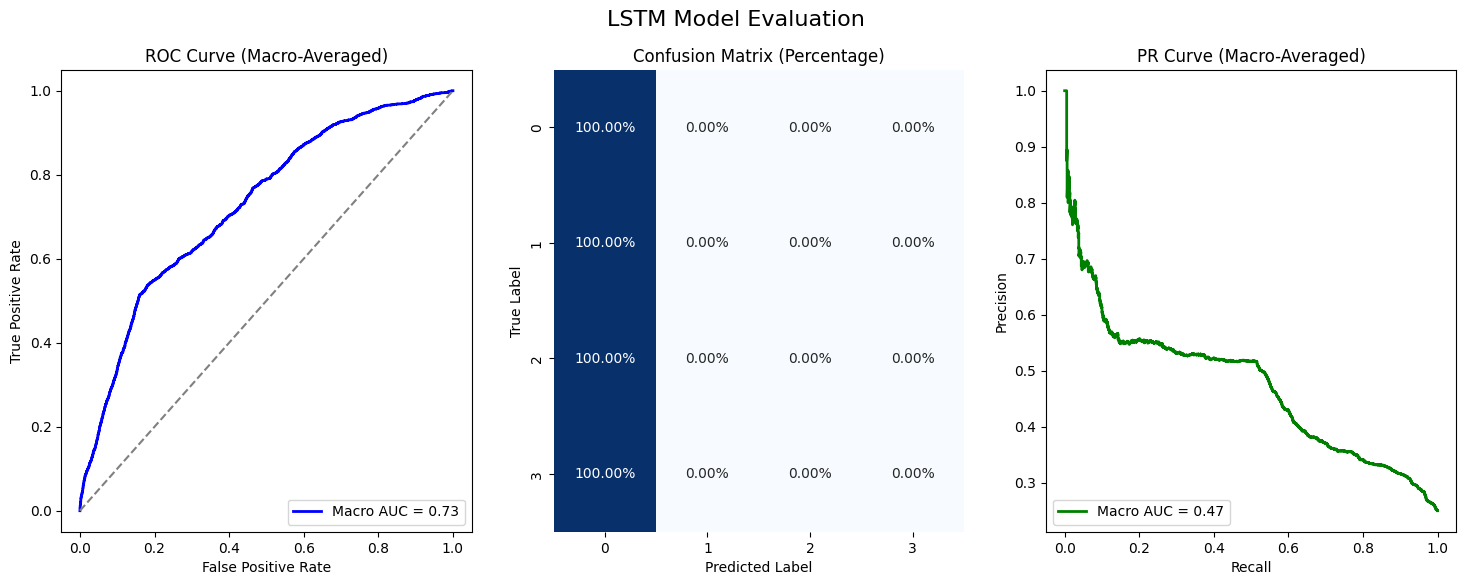

Training GRU model...
Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5045 - loss: 1.2289 - val_accuracy: 0.5108 - val_loss: 1.1990
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5121 - loss: 1.1984 - val_accuracy: 0.5108 - val_loss: 1.1997
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5116 - loss: 1.1967 - val_accuracy: 0.5108 - val_loss: 1.2014
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5162 - loss: 1.1928 - val_accuracy: 0.5108 - val_loss: 1.1993
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5077 - loss: 1.2009 - val_accuracy: 0.5108 - val_loss: 1.2007
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
GRU Model - Accuracy: 0.5158, Precision: 0.2661, Recall: 0.5158, F1 Score: 0.3511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


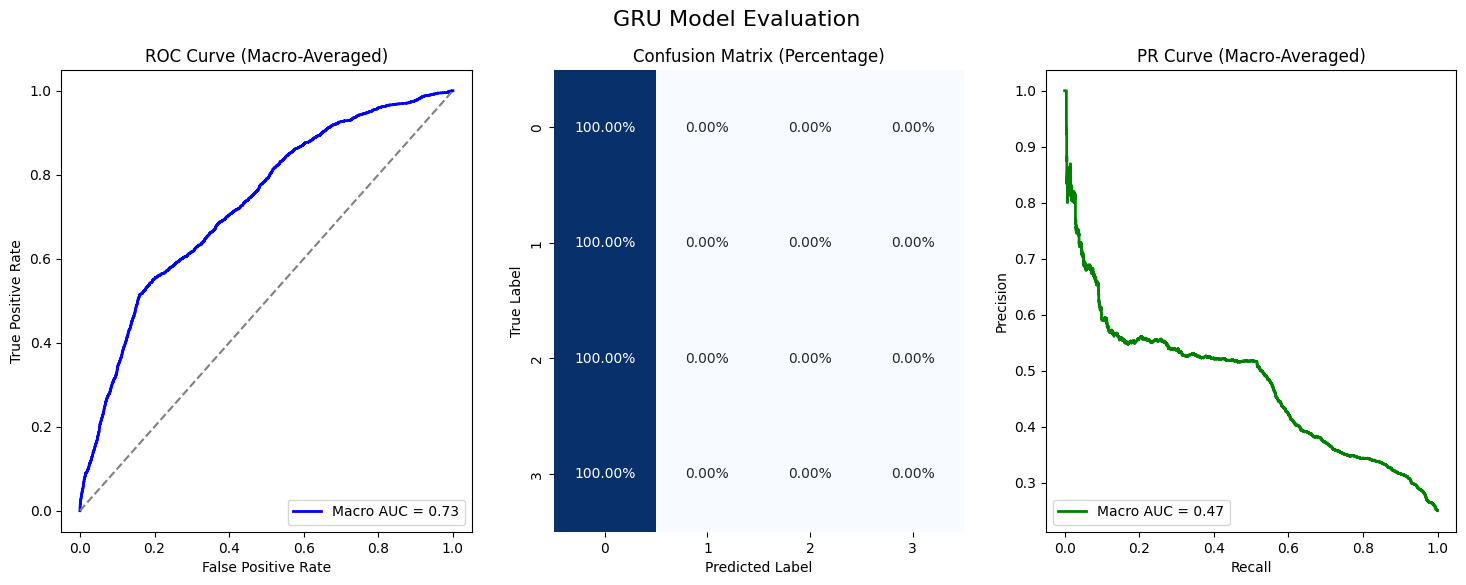

Training CNN-LSTM model...
Epoch 1/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4824 - loss: 1.2665 - val_accuracy: 0.5108 - val_loss: 1.2001
Epoch 2/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5043 - loss: 1.2053 - val_accuracy: 0.5108 - val_loss: 1.2008
Epoch 3/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5105 - loss: 1.1938 - val_accuracy: 0.5108 - val_loss: 1.2005
Epoch 4/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5127 - loss: 1.1937 - val_accuracy: 0.5108 - val_loss: 1.1997
Epoch 5/5
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5144 - loss: 1.1944 - val_accuracy: 0.5108 - val_loss: 1.2009
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN-LSTM Model - Accuracy: 0.5158, Precision: 0.2661, Recall: 0.5158, F1 Score: 0.3511


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


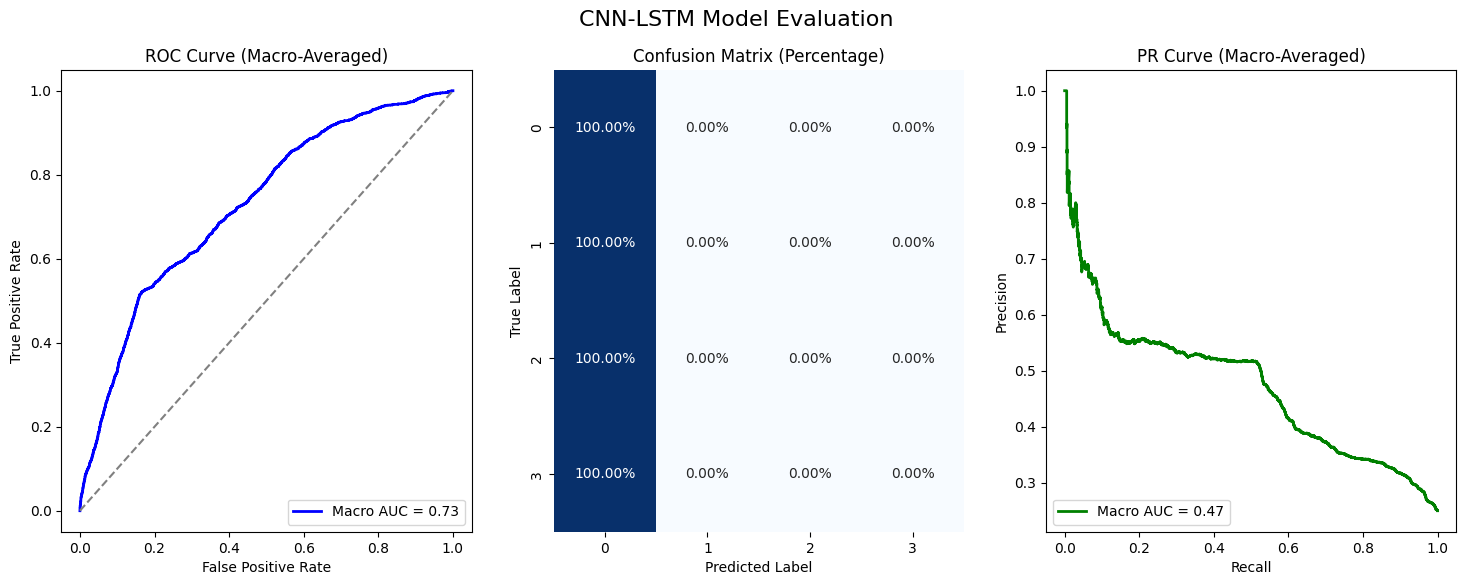


CNN Results:
accuracy: 0.5158
precision: 0.2661
recall: 0.5158
f1_score: 0.3511

LSTM Results:
accuracy: 0.5158
precision: 0.2661
recall: 0.5158
f1_score: 0.3511

GRU Results:
accuracy: 0.5158
precision: 0.2661
recall: 0.5158
f1_score: 0.3511

CNN-LSTM Results:
accuracy: 0.5158
precision: 0.2661
recall: 0.5158
f1_score: 0.3511


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Initialize LabelBinarizer for multi-class transformation
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Loop through each model, compile, train, and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name} model...")

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict probabilities on the test set
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    print(f"{name} Model - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Create a figure with three subplots: ROC, Confusion Matrix, and PR curve
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # ROC Curve for each class with macro-averaged AUC
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(lb.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    ax[0].plot(fpr["macro"], tpr["macro"], color='blue', lw=2, label=f'Macro AUC = {roc_auc["macro"]:.2f}')
    ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[0].set_title('ROC Curve (Macro-Averaged)')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].legend(loc='lower right')

    # Confusion Matrix as percentages
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=ax[1])
    ax[1].set_title('Confusion Matrix (Percentage)')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    # Precision-Recall Curve for each class with macro-averaged AUC
    precision_vals = {}
    recall_vals = {}
    pr_auc = {}
    for i in range(len(lb.classes_)):
        precision_vals[i], recall_vals[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        pr_auc[i] = auc(recall_vals[i], precision_vals[i])
    precision_vals["macro"], recall_vals["macro"], _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
    pr_auc["macro"] = auc(recall_vals["macro"], precision_vals["macro"])

    ax[2].plot(recall_vals["macro"], precision_vals["macro"], color='green', lw=2, label=f'Macro AUC = {pr_auc["macro"]:.2f}')
    ax[2].set_title('PR Curve (Macro-Averaged)')
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precision')
    ax[2].legend(loc='lower left')

    # Save the figure as a high-resolution image
    plt.suptitle(f'{name} Model Evaluation', fontsize=16)
    plt.savefig(f'{name}_evaluation.png', dpi=300)
    plt.show()

# Output final results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


<ipython-input-114-9f158051246e>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)


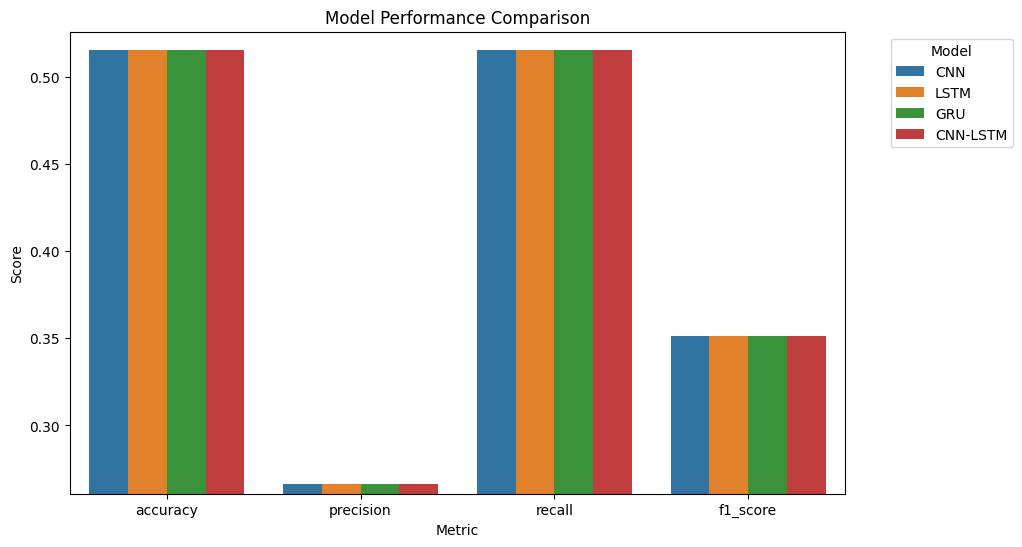

In [114]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Convert results dictionary to DataFrame for easier plotting
df_results = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='metric', value_name='score')
df_results.rename(columns={'index': 'model'}, inplace=True)

# Determine y-axis range
min_score = df_results['score'].min() * 0.98
max_score = df_results['score'].max() * 1.02

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)

# Set y-axis limits
ax.set_ylim(min_score, max_score)

# Set plot labels and title
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')

# Show the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


# MULTICLASS Model Training Using Data Labeled by DBSCAN (017271-PNL01_LUNG_KWONG_HSE)

In [129]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/WTS_PROJECT/final_df_clean.csv')


data['Datetime'] = pd.to_datetime(data['Datetime'])

In [130]:
data.set_index("Datetime",inplace=True)

In [131]:
# Assuming you want to keep the following columns
column_to_keep = [

    #'JUN_P23',
    #'JUN_P34',
    #'JUN_P36'


    #'JUN_P34',
    #'381789-PNL5_JUN011-AMP',
    #'381789-PNL4_BISHOP_FORD_MEM_SCH-AMP',
    #'350659-PNL2_MEI_TAK_HOUSE-AMP'


    #'361626-PNL2_CHUI_YUEN_HSE-AMP',
    #'017271-PNL3_CHUK_YUEN_MKT_CENTRAL_A_C-AMP',
    '017271-PNL01_LUNG_KWONG_HSE_^A^_BD_A-AMP',
    '029256-PNLBA_3_BD_A-CHUI_YUEN_HSE-AMP',
    #'029256-PNLBA_2_BD_A-BD_B-AMP',
    #'029256-PNLBB_7_BD_B-BD_A-AMP'


]

# Drop all other columns from the DataFrame
data = data[column_to_keep]

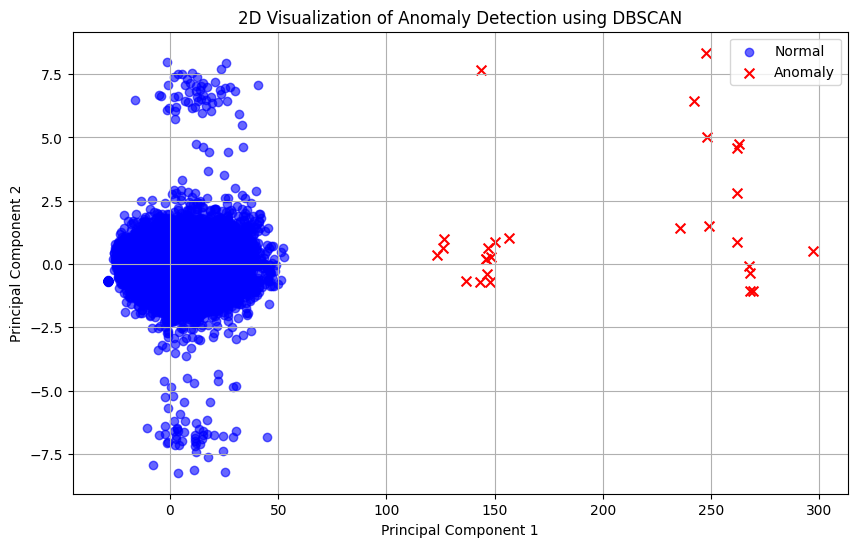

In [132]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 1: Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data.values)  # Transform to 2D

# Step 2: Apply DBSCAN for anomaly detection
dbscan = DBSCAN(eps=28, min_samples=48)  # Adjust these parameters if needed
labels = dbscan.fit_predict(data_2d)

# Step 3: Identify anomalies (noise points labeled as -1)
data['anomaly'] = (labels == -1).astype(int)  # 1 = Anomaly, 0 = Normal

# Separate normal and anomalous data for visualization
normal_data = data_2d[labels != -1]
anomalies = data_2d[labels == -1]

# Step 4: Plot the 2D visualization with anomalies marked
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], c='blue', label='Normal', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', marker='x', label='Anomaly', s=50)

# Step 5: Set the title, labels, and legend
plt.title('2D Visualization of Anomaly Detection using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()




In [133]:
#DataFrame to a CSV file

drive_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_017271-PNL01_LUNG_KWONG_HSE_002.csv'

data.to_csv(drive_path)

## LOAD DF

In [147]:
import pandas as pd
file_path = '/content/drive/My Drive/WTS_PROJECT/DBSCAN_Labeled_data_017271-PNL01_LUNG_KWONG_HSE_002.csv'
data = pd.read_csv(file_path,index_col=0)

data.index = pd.to_datetime(data.index)

# %%
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# %%
data.loc[data[target]==-1,target] = 0

In [148]:
import pandas as pd
import numpy as np

data['time_to_next_anomaly'] = None
anomaly_0_indices = data.index[data['anomaly'] == 0]
last_timestamp = data.index[-1]

for idx in data.index:
    if data.loc[idx, 'anomaly'] == 0:
        data.loc[idx, 'time_to_next_anomaly'] = 0
    elif data.loc[idx, 'anomaly'] == 1:
        future_anomalies = anomaly_0_indices[anomaly_0_indices > idx]
        if len(future_anomalies) > 0:
            next_anomaly_0_time = future_anomalies[0]
            time_difference = (next_anomaly_0_time - idx).total_seconds() / 60
            data.loc[idx, 'time_to_next_anomaly'] = time_difference
        else:
            data.loc[idx, 'time_to_next_anomaly'] = np.nan

data = data.dropna(subset=['time_to_next_anomaly']).copy()

In [149]:

# 获取 time_to_next_anomaly 列的最小值和最大值
min_value = data['time_to_next_anomaly'].dropna().min()
max_value = data['time_to_next_anomaly'].dropna().max()

# 计算各区间阈值
threshold_1 = min_value + (max_value - min_value) / 8
threshold_2 = min_value + (max_value - min_value) / 4
threshold_3 = min_value + (max_value - min_value) / 2

def assign_anomaly_category(row):
    if pd.isna(row['time_to_next_anomaly']):
        return row['anomaly']
    elif row['time_to_next_anomaly'] <= threshold_1:
        return 0
    elif row['time_to_next_anomaly'] <= threshold_2:
        return 1
    elif row['time_to_next_anomaly'] <= threshold_3:
        return 2
    else:
        return 3

data['anomaly'] = data.apply(assign_anomaly_category, axis=1)

print("Thresholds:", threshold_1, threshold_2, threshold_3, max_value)
print(data[['anomaly', 'time_to_next_anomaly']].head())

Thresholds: 52.5 105.0 210.0 420.0
                     anomaly time_to_next_anomaly
Datetime                                         
2023-06-24 00:00:00        0                    0
2023-06-24 00:30:00        0                    0
2023-06-24 01:00:00        0                    0
2023-06-24 01:30:00        0                    0
2023-06-24 02:00:00        0                    0


In [150]:
if 'time_to_next_anomaly' in data.columns:
    data = data.drop(columns =['time_to_next_anomaly'])

In [151]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Extract the list of feature columns and remove the target column
features = data.columns.tolist()
target = 'anomaly'
features.remove(target)

# Normalize the features using Min-Max scaling
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Define a function to create time-series data using a sliding window
def create_time_series(data, features, target, window_size=5):
    X, y = [], []  # Initialize empty lists for features and targets

    # Iterate over the data to extract sliding windows
    for i in range(len(data) - window_size):
        # Extract a window of feature values
        X_window = data[features].iloc[i:i + window_size].values
        # Get the target value at the end of the current window
        y_target = data[target].iloc[i + window_size]

        X.append(X_window)  # Store the extracted window in X
        y.append(y_target)  # Store the target value in y

    # Convert lists to NumPy arrays for better performance
    return np.array(X), np.array(y)

# Call the function to generate the input (X) and target (y) for the time series
X, y = create_time_series(data, features, target, window_size=5)

# Print the shapes of the resulting arrays
print(f'X shape: {X.shape}, y shape: {y.shape}')


X shape: (17563, 5, 2), y shape: (17563,)


In [152]:
from collections import Counter
print(Counter(y))

Counter({0: 17537, 3: 14, 2: 8, 1: 4})


In [145]:
import numpy as np
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

# Assume X and y are already defined here
# For example:
# X = np.random.rand(17563, 10, 10)  # Random data in 3D
# y = np.concatenate([np.zeros(17537), np.ones(4), np.full(8, 2), np.full(14, 3)])

# Flatten the data
n_samples, n_features, n_features_2 = X.shape
X_flattened = X.reshape(n_samples, n_features * n_features_2)

# Class counts from your provided data
class_counts = Counter(y)
print("Class counts:", class_counts)

# Define minority classes based on your specific data
minority_classes = [1, 2, 3]  # Actual minority class labels

# Set up sampling strategy specifically for minority classes
sampling_strategy = {
    class_label: min(class_counts[class_label], max(int(max_class_count * 0.05), class_counts[class_label]))
    for class_label in minority_classes
}

# Initialize SMOTETomek with SMOTE and TomekLinks components
smote_tomek = SMOTETomek(
    smote=SMOTE(sampling_strategy=sampling_strategy, k_neighbors=1, random_state=42),
    tomek=TomekLinks(sampling_strategy='all')
)

# Apply SMOTETomek on the flattened data
X_resampled, y_resampled = smote_tomek.fit_resample(X_flattened, y)

# Reshape X back to its original 3D shape if necessary
X_resampled = X_resampled.reshape(-1, n_features, n_features_2)

# Print the shapes to verify the resampling
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print(f"Resampled X shape: {X_resampled.shape}, y shape: {y_resampled.shape}")

# Now split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Print the new class distribution after resampling
print("New class distribution:", Counter(y_resampled))

Class counts: Counter({0: 17537, 3: 14, 2: 8, 1: 4})
Original X shape: (17563, 5, 2), y shape: (17563,)
Resampled X shape: (17555, 5, 2), y shape: (17555,)
New class distribution: Counter({0: 17534, 3: 12, 2: 7, 1: 2})


In [153]:
import numpy as np
from collections import Counter
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split

# Assume X and y are defined, e.g., X = np.random.rand(17563, 5, 2), y = <your array of labels>

# Flatten the data
n_samples, n_features, n_features_2 = X.shape
X_flattened = X.reshape(n_samples, n_features * n_features_2)

# Class counts from your provided data
class_counts = Counter(y)
print("Class counts:", class_counts)

# Desired number of samples per minority class
desired_samples_per_class = 876

# Set up sampling strategy specifically for minority classes
sampling_strategy = {1: desired_samples_per_class, 2: desired_samples_per_class, 3: desired_samples_per_class}

# Initialize SMOTETomek with SMOTE and TomekLinks components
smote_tomek = SMOTETomek(
    smote=SMOTE(sampling_strategy=sampling_strategy, k_neighbors=min(5, min(class_counts.values()) - 1), random_state=42),
    tomek=TomekLinks(sampling_strategy='all')
)

# Apply SMOTETomek on the flattened data
X_resampled, y_resampled = smote_tomek.fit_resample(X_flattened, y)

# Reshape X back to its original 3D shape if necessary
X_resampled = X_resampled.reshape(-1, n_features, n_features_2)

# Print the shapes to verify the resampling
print(f"Original X shape: {X.shape}, y shape: {y.shape}")
print(f"Resampled X shape: {X_resampled.shape}, y shape: {y_resampled.shape}")

# Now split the resampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Print the new class distribution after resampling
print("New class distribution:", Counter(y_resampled))

Class counts: Counter({0: 17537, 3: 14, 2: 8, 1: 4})
Original X shape: (17563, 5, 2), y shape: (17563,)
Resampled X shape: (20161, 5, 2), y shape: (20161,)
New class distribution: Counter({0: 17535, 2: 876, 1: 876, 3: 874})


In [154]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

# 1. CNN Model
def build_cnn(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 2. LSTM Model
def build_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 3. GRU Model
def build_gru(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# 4. CNN-LSTM Model (without TimeDistributed)
def build_cnn_lstm(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
    return model

# List of models to build
models = {
    "CNN": build_cnn(X_train.shape[1:]),
    "LSTM": build_lstm(X_train.shape[1:]),
    "GRU": build_gru(X_train.shape[1:]),
    "CNN-LSTM": build_cnn_lstm(X_train.shape[1:])
}


Training CNN model...
Epoch 1/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8677 - loss: 0.6702 - val_accuracy: 0.9132 - val_loss: 0.2053
Epoch 2/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9296 - loss: 0.1766 - val_accuracy: 0.9237 - val_loss: 0.1802
Epoch 3/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9347 - loss: 0.1569 - val_accuracy: 0.9275 - val_loss: 0.1633
Epoch 4/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.1616 - val_accuracy: 0.9439 - val_loss: 0.1615
Epoch 5/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9403 - loss: 0.1486 - val_accuracy: 0.9516 - val_loss: 0.1574
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
CNN Model - Accuracy: 0.9596, Precision: 0.9710, Recall: 0.9596, F1 Score: 0.9571


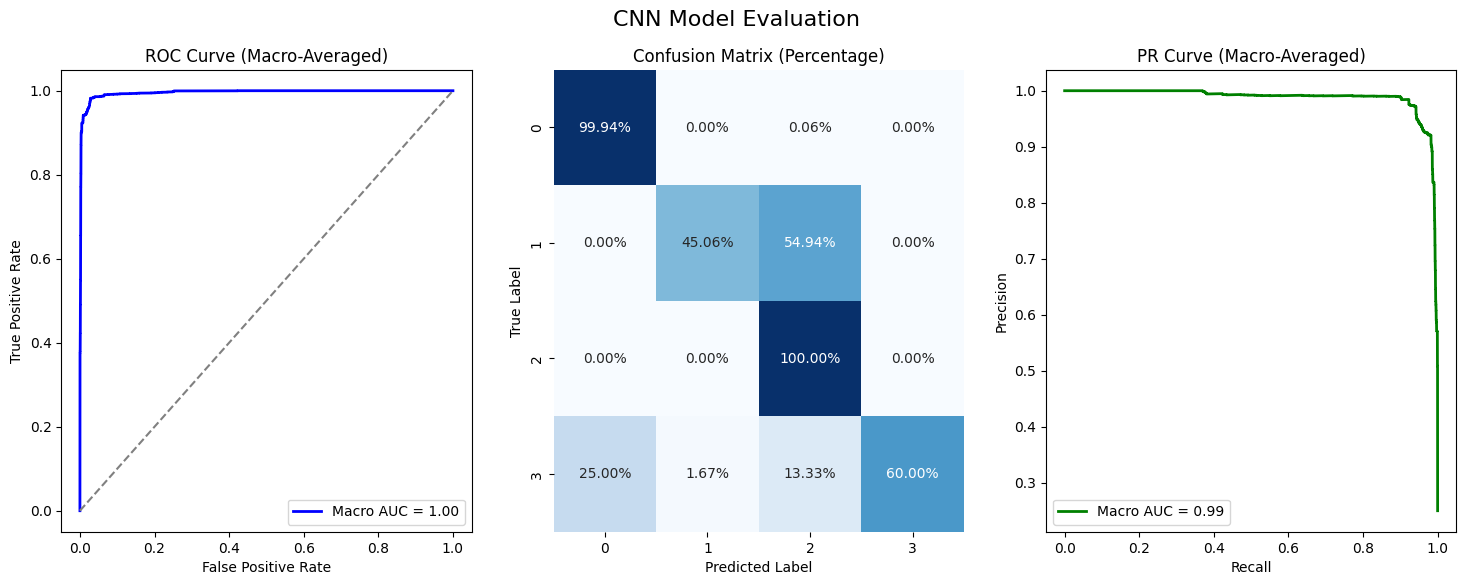

Training LSTM model...
Epoch 1/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8794 - loss: 0.5367 - val_accuracy: 0.9110 - val_loss: 0.2091
Epoch 2/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9258 - loss: 0.1862 - val_accuracy: 0.9200 - val_loss: 0.1803
Epoch 3/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9349 - loss: 0.1518 - val_accuracy: 0.9262 - val_loss: 0.1415
Epoch 4/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9399 - loss: 0.1364 - val_accuracy: 0.9293 - val_loss: 0.1425
Epoch 5/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9405 - loss: 0.1317 - val_accuracy: 0.9399 - val_loss: 0.1314
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
LSTM Model - Accuracy: 0.9489, Precision: 0.9532, Recall: 0.9489, F1 Score: 0.9491


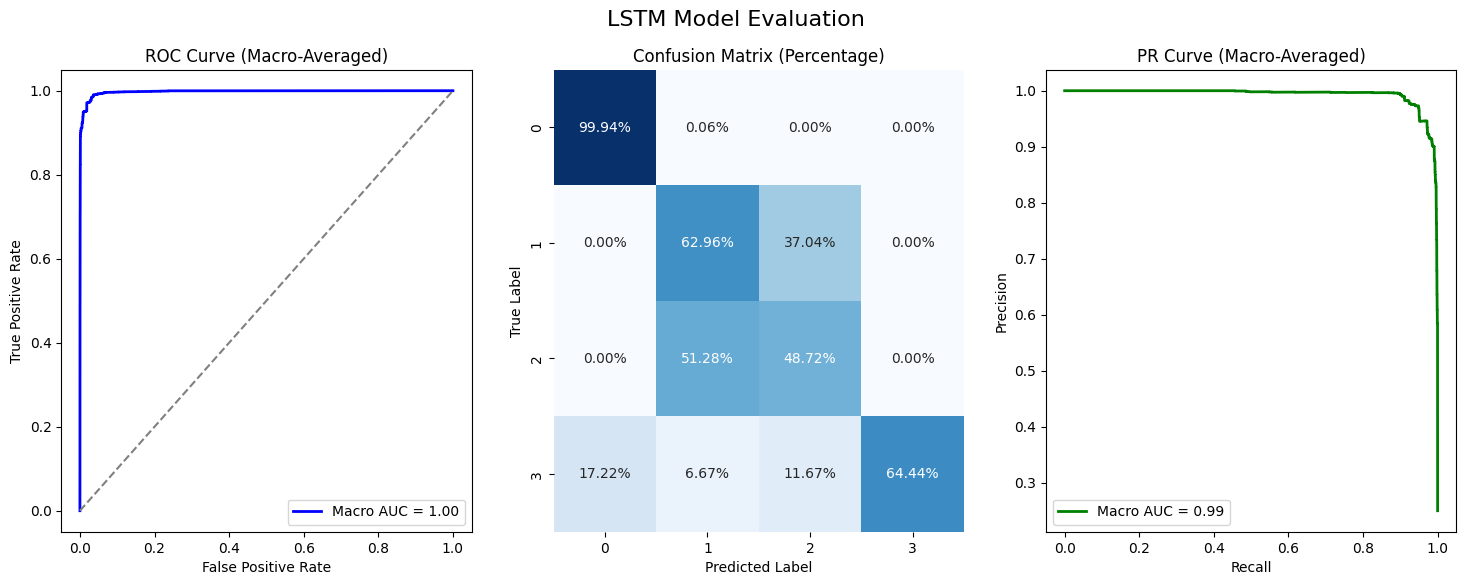

Training GRU model...
Epoch 1/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8920 - loss: 0.4808 - val_accuracy: 0.9194 - val_loss: 0.1775
Epoch 2/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9288 - loss: 0.1591 - val_accuracy: 0.9538 - val_loss: 0.1406
Epoch 3/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9414 - loss: 0.1231 - val_accuracy: 0.9662 - val_loss: 0.1319
Epoch 4/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9479 - loss: 0.1220 - val_accuracy: 0.9389 - val_loss: 0.1173
Epoch 5/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9533 - loss: 0.1180 - val_accuracy: 0.9659 - val_loss: 0.1056
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
GRU Model - Accuracy: 0.9720, Precision: 0.9796, Recall: 0.9720, F1 Score: 0.9717


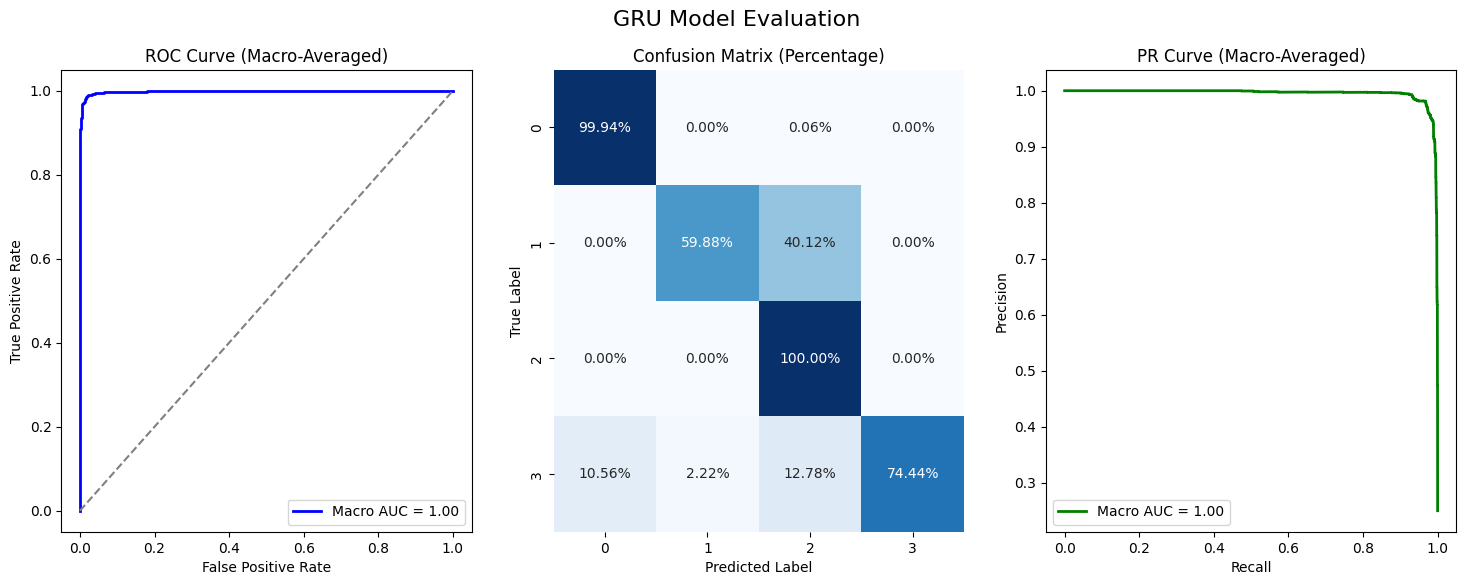

Training CNN-LSTM model...
Epoch 1/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8675 - loss: 0.6787 - val_accuracy: 0.9148 - val_loss: 0.1956
Epoch 2/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9259 - loss: 0.1696 - val_accuracy: 0.9247 - val_loss: 0.1591
Epoch 3/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9351 - loss: 0.1455 - val_accuracy: 0.9408 - val_loss: 0.1377
Epoch 4/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9355 - loss: 0.1396 - val_accuracy: 0.9389 - val_loss: 0.1265
Epoch 5/5
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9407 - loss: 0.1234 - val_accuracy: 0.9482 - val_loss: 0.1244
127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN-LSTM Model - Accuracy: 0.9239, Precision: 0.9181, Recall: 0.9239, F1 Score: 0.9043


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


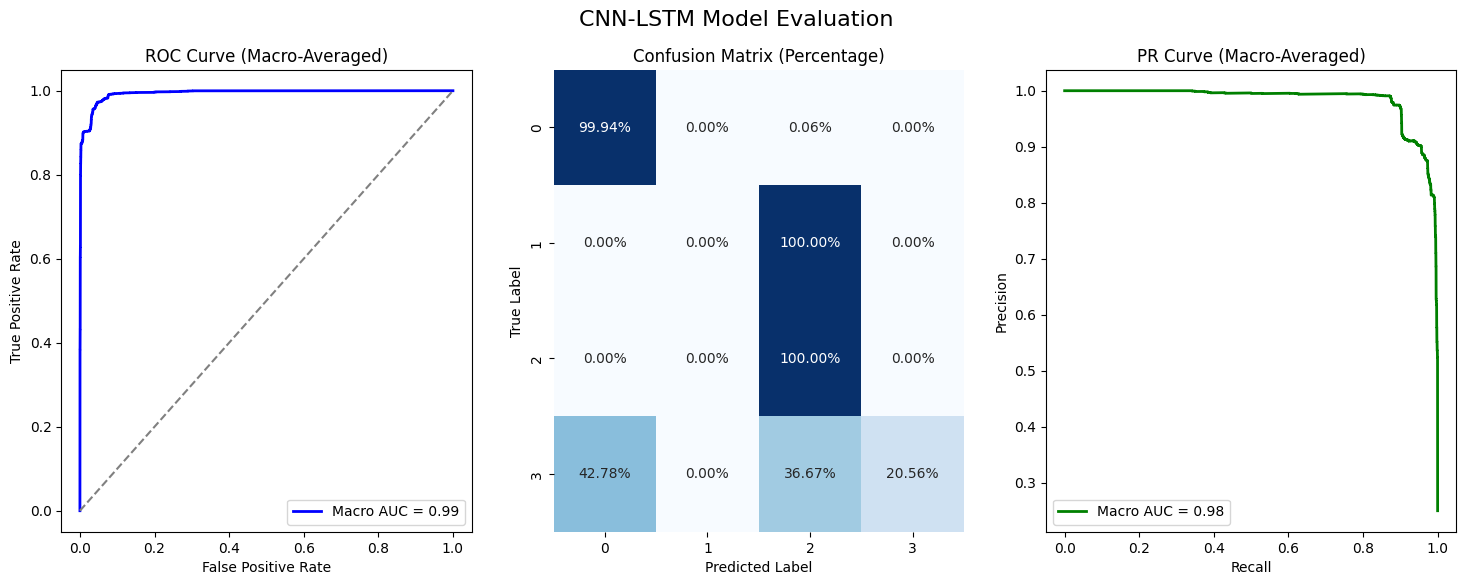


CNN Results:
accuracy: 0.9596
precision: 0.9710
recall: 0.9596
f1_score: 0.9571

LSTM Results:
accuracy: 0.9489
precision: 0.9532
recall: 0.9489
f1_score: 0.9491

GRU Results:
accuracy: 0.9720
precision: 0.9796
recall: 0.9720
f1_score: 0.9717

CNN-LSTM Results:
accuracy: 0.9239
precision: 0.9181
recall: 0.9239
f1_score: 0.9043


In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

# Define EarlyStopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Initialize LabelBinarizer for multi-class transformation
lb = LabelBinarizer()
y_train_bin = lb.fit_transform(y_train)
y_test_bin = lb.transform(y_test)

# Loop through each model, compile, train, and evaluate
results = {}
for name, model in models.items():
    print(f"Training {name} model...")

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=5,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict probabilities on the test set
    y_prob = model.predict(X_test)
    y_pred = np.argmax(y_prob, axis=1)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    print(f"{name} Model - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    # Create a figure with three subplots: ROC, Confusion Matrix, and PR curve
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    # ROC Curve for each class with macro-averaged AUC
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(lb.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    fpr["macro"], tpr["macro"], _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    ax[0].plot(fpr["macro"], tpr["macro"], color='blue', lw=2, label=f'Macro AUC = {roc_auc["macro"]:.2f}')
    ax[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax[0].set_title('ROC Curve (Macro-Averaged)')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].legend(loc='lower right')

    # Confusion Matrix as percentages
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_percent, annot=True, fmt='.2%', cmap='Blues', cbar=False, ax=ax[1])
    ax[1].set_title('Confusion Matrix (Percentage)')
    ax[1].set_xlabel('Predicted Label')
    ax[1].set_ylabel('True Label')

    # Precision-Recall Curve for each class with macro-averaged AUC
    precision_vals = {}
    recall_vals = {}
    pr_auc = {}
    for i in range(len(lb.classes_)):
        precision_vals[i], recall_vals[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        pr_auc[i] = auc(recall_vals[i], precision_vals[i])
    precision_vals["macro"], recall_vals["macro"], _ = precision_recall_curve(y_test_bin.ravel(), y_prob.ravel())
    pr_auc["macro"] = auc(recall_vals["macro"], precision_vals["macro"])

    ax[2].plot(recall_vals["macro"], precision_vals["macro"], color='green', lw=2, label=f'Macro AUC = {pr_auc["macro"]:.2f}')
    ax[2].set_title('PR Curve (Macro-Averaged)')
    ax[2].set_xlabel('Recall')
    ax[2].set_ylabel('Precision')
    ax[2].legend(loc='lower left')

    # Save the figure as a high-resolution image
    plt.suptitle(f'{name} Model Evaluation', fontsize=16)
    plt.savefig(f'{name}_evaluation.png', dpi=300)
    plt.show()

# Output final results
for model_name, metrics in results.items():
    print(f"\n{model_name} Results:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


<ipython-input-156-9f158051246e>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)


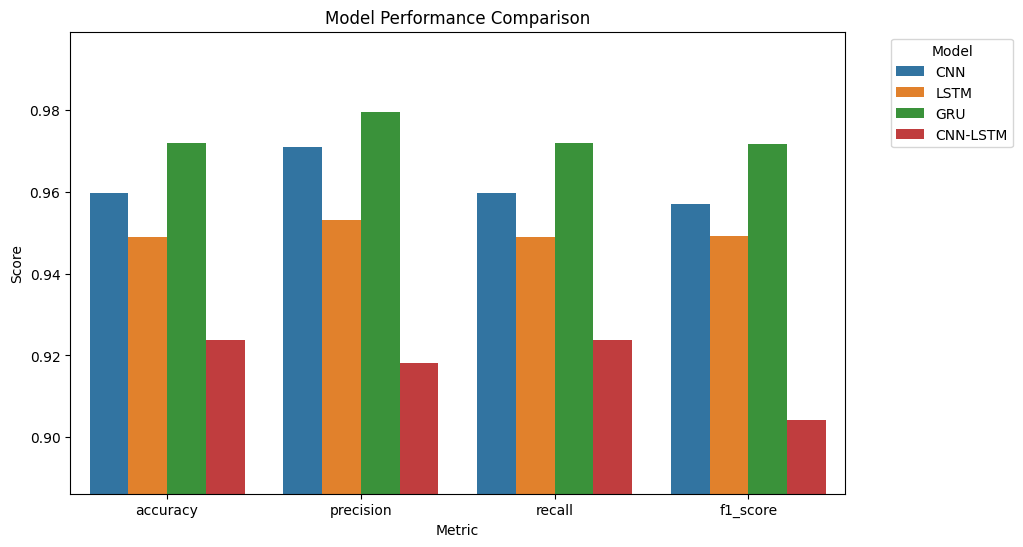

In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Convert results dictionary to DataFrame for easier plotting
df_results = pd.DataFrame(results).T.reset_index().melt(id_vars='index', var_name='metric', value_name='score')
df_results.rename(columns={'index': 'model'}, inplace=True)

# Determine y-axis range
min_score = df_results['score'].min() * 0.98
max_score = df_results['score'].max() * 1.02

# Plot the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_results, x='metric', y='score', hue='model', ci=None)

# Set y-axis limits
ax.set_ylim(min_score, max_score)

# Set plot labels and title
ax.set_title('Model Performance Comparison')
ax.set_xlabel('Metric')
ax.set_ylabel('Score')

# Show the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()
